# A stock-flow consistent macroeconomic model with heterogeneous agents: the master equation approach

#### Matheus Grasselli and Patrick Li

https://www.risk.net/journal-of-network-theory-in-finance/5720576/a-stock-flow-consistent-macroeconomic-model-with-heterogeneous-agents-the-master-equation-approach   
https://github.com/patrickxli/sfcMacro/blob/master/GL_2018_JNTF_ABM_MFA_positive_growth.py   

**Instructions** If you are viewing this notebook in preview mode (you will see `/html/` in the URL), & you wish to open it in full Jupyter interactive mode you will need to click on "Sign-in" or "Clone" to sign-in to Azure using a Microsoft (e.g. Hotmail/Outlook) account & clone the library. You do not need to sign-in to download the notebook to run it locally using the python installation on your computer.   
The output from a previous run is available in the subfolder: `/output/AB-SFC`

#### NEED TO KNOW

* Develops a mean-field approximation to a stock-flow consistent agent-based macroeconomic model with heterogeneous firms and household
* Confirms accuracy of the approximation by comparing the values for aggregate variables such as equity prices and economic output obtained from the numerical simulation of the full agent-based model with their corresponding mean-field values
* Uses the fast mean-field approximation to explore the parameter space and calculate sensitivity of model outcomes with respect to underlying parameters. 

#### ABSTRACT

We propose a mean-field approximation to a stock-flow consistent agent-based macro- economic model with heterogeneous firms and households. Depending on their investment elasticity to past profits, firms can be either aggressive or conservative. Conversely, households are divided into investor and noninvestor groups, depending on whether or not they invest a portion of their wealth in the stock market. Both firms and households dynamically change their type according to transition probabilities specified exogenously. The mean-field approximation consists of homogenizing the balance-sheet variables for agents (firms or households) of the same type and computing the time evolution of the corresponding average as a combination of the deterministic dynamic, derived from investment and consumption decisions before a change of type, and the probabilistic change in type, with an appropriate rebalancing to take stock-flow consistency into account. The last step of the approximation consists in replacing the underlying Markov chain with a continuous-time diffusive limit. We present numerical experiments showing the accuracy of the approximation and the sensitivity of the model with respect to several discretionary parameters.

## Code

### Viewing the plots

To see the plot files **follow this link**: [./output/AB-SFC](https://notebooks.azure.com/ian-buckley/libraries/systemic-risk/tree/output/AB-SFC)

#### Monte Carlo results

In [49]:
!ls ./output/AB-SFC/*.txt

./output/AB-SFC/__main___run_0_ABM_monte_carlo_results.txt
./output/AB-SFC/__main___run_0_MFA_monte_carlo_results.txt


In [51]:
!head "./output/AB-SFC/__main___run_0_ABM_monte_carlo_results.txt"

0.000000000000000000e+00	2.610443712013621811e-02	3.590381365659133656e-02	3.135097279448194330e-02	9.045237782530825971e-03	2.027385807657569039e-01	1.183544174680672412e-01	2.582544441187141146e-02	6.826585534114493203e-02


#### Images

In [22]:
imageFiles=["__main___run_0_fig_05_300_periods_fraction.jpg","__main___run_0_fig_05_aggressive.jpg", \
    "__main___run_0_fig_05_conservative.jpg","__main___run_0_fig_05_hedge_negative_capital_investment.jpg",\
    "__main___run_0_fig_05.jpg","__main___run_0_fig_05_negative_capital_investment.jpg",\
    "__main___run_0_fig_05_ponzi_investment_capital_total_vs_negative.jpg",\
    "__main___run_0_fig_05_ponzi_negative_capital_investment.jpg",\
    "__main___run_0_fig_05_speculative_negative_capital_investment.jpg",\
    "__main___run_0_fig_06_capital_investment.jpg","__main___run_0_fig_06.jpg",\
    "__main___run_0_fig_07.jpg","__main___run_0_fig_09.jpg","__main___run_0_fig_10.jpg",\
    "__main___run_0_fig_11.jpg","__main___run_0_fig_12.jpg"]

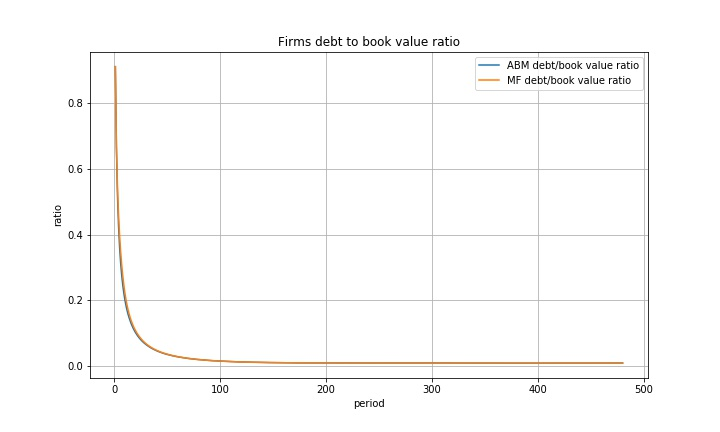

In [52]:
from IPython.display import Image
Image("./output/AB-SFC/__main___run_0_fig_11.jpg")

In [53]:
for file in imageFiles:
    display(Image("./output/AB-SFC/" + file))

### Shell commands to tidy the output

Once the python code below has finished running, use the following shell commands to create a folder `/home/nbuser/library/output/AB-SFC` for the output (only need to run that once) & copy the `.jpg`, `.txt` & `.eps` files to the folder. (Alternatively the python code itself could be modified, but this is adequate for now.) 

In [16]:
#!mkdir ./output/AB-SFC  # /home/nbuser/library/output/AB-SFC
!mv __main__*.* ./output/AB-SFC
!mv Figure_*.* ./output/AB-SFC
!ls ./output/AB-SFC

**=============== END OF CODE ADDED TO FACILITATE RUNNING `GL_2018_JNTF_ABM_MFA_positive_growth.py` ON AZURE ========** 

### `GL_2018_JNTF_ABM_MFA_positive_growth.py`

https://github.com/patrickxli/sfcMacro/blob/master/GL_2018_JNTF_ABM_MFA_positive_growth.py  

In [ ]:
# -*- coding: utf-8 -*-
"""
2018-07-03

@author: Patrick X. Li

Department of Mathematics and Statistics
McMaster University

"""

In [1]:
import sys, os
import numpy as np
from random import normalvariate
import matplotlib.pyplot as plt
from matplotlib import rcParams

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [2]:
def safe_divide( numer_array, denom_array  ):
    temp = np.zeros(( numer_array.size))
    for idx in range(numer_array.size):
        if denom_array[idx] == 0:
            temp[idx] = 0.0
        else:
            temp[idx] = numer_array[idx] / denom_array[idx]
            
    return temp

In [3]:
rcParams['figure.figsize'] = 10, 6
simulation_rounds = 1
ABM_activate = 1 # to activate ABM simulation: ABM_activate = 1
unit_test_activate = 0 # to activate unit test: unit_test_activate = 1 
plot_activate = 1 # to activate plot: plot_activate = 1

In [4]:
monte_carlo_mean_growth_rate_equity_price = np.zeros((2, simulation_rounds ))
monte_carlo_sample_std_growth_rate_equity_price = np.zeros((2, simulation_rounds ))
monte_carlo_mean_growth_rate_nominal_output = np.zeros((2, simulation_rounds ))
monte_carlo_sample_std_growth_rate_nominal_output = np.zeros((2, simulation_rounds ))
monte_carlo_mean_debt_output_ratio = np.zeros((2, simulation_rounds ))
monte_carlo_sample_std_debt_output_ratio = np.zeros((2, simulation_rounds )) 
monte_carlo_mean_debt_book_value_ratio = np.zeros((2, simulation_rounds ))
monte_carlo_sample_std_debt_book_value_ratio = np.zeros((2, simulation_rounds ))
monte_carlo_results = np.zeros(( simulation_rounds, 9)) # to store all monte carlo results that need to be output in txt files
monte_carlo_results[:,0] = np.arange(simulation_rounds)

In [5]:
for MC_round in range(simulation_rounds):
    
    flag_market_crash = 0;   # flag that market crashes   
        
    
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ## plot parameter
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

    fig_width = 3
    fig_height = 2
    small_fig_width = fig_width
    small_fig_height = fig_height
    full_name = os.path.basename(sys.argv[0])
    name =  os.path.splitext(full_name)[0]
    print("file in run: " + name)
    
    prefix = name + '_run_' + str(MC_round) + '_'
    print("log file name under: " + prefix)
    periods_to_kill = 0
    flag_save = 0
    
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ## simulation parameter
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    M = 4000;                           # number of household
    N= 1000                               # number of firms
    T= 480;                               # time periods
    print("total periods: " + str(T))
    
    
    """ 
    firms switching mechanism parameters: 
    """
    mu_f = 0.6
    lambda_f = 0.4

    initial_mu_f = 0.2
    initial_lambda_f = 0.8

    wage = 1.0     # w = 1.0  wage rate per employed person                         
    productivity = 1.0     # a=1 labout productivity 
    cost = wage/productivity    # unit labout cost c=w/a    
    """
    constant markup over unit cost
    """
    Chi = 1.4        
    
    """
    assume firm's proportion of revenue to retain is Pi = 1 - 1 /Chi = (Chi - 1)/Chi
    """
    Pi =  ( Chi - 1 ) / Chi
    
    """
    Firms annualized dividend yield. Here we mimick one simulation period = one quarter, 
    this implies we need to use delta_e/4 = 0.01 in the following in order to have annualized dividend 
    yield = 0.04
    """
    delta_e = 0.04
    
    """
    parameters for firm's investment rule                                    
    2 types of firms: 
        (1) aggressive firm, alpha_1; 
        (2) conservative firm, alpha_2.
    """
    alpha = [ 0.575  ,  0.4 ]

    beta = 0.16 # elasticity of investment to past demand (production), fixed
        
    gamma = 0.05 # elasticity of investment to debt level, fixed
    
    """
    parameter for the weight of preferential detachment 
    at distributing individual output, eta
    """
    eta = 0.3
    
    """ 
    basic annualized interest rate. Here we mimick one simulation period = one quarter, 
    this implies we need to use i_bar/4 = 0.01 in the following for one simulation period, 
    in order to have annualized interest rate = 0.04
    """
    i_bar = 0.04 # fixed      
    
    """
    depreciation rate for capital (asset), 
    general plausible assumption is annual depreciation rate = 0.035 approxmiately = 0.04
    Notice one simulation period = one quarter, we need to use delta/4 = 0.01 in the following 
    to mimic the depreciation rate of each quarter. 
    """
    delta = 0.04 # fixed                        
         
    """
    varpi: proportion of firm using debt to finance its (investment demand - retained profit) 
    (1-varpi): proportion of firm using new equity to finance its (investment demand - retained profit) 
    """        
    varpi = 0.6
    """
    assume firm has to keep at minimum debt:equity = 6:1. That is debt/capital = 6/(6+1) = 6/7 = 85.7%
    firm's debt-to-capital ratio threshold, Corrado's value = 6
    if firm is with ratio higher than this
    threshold, firm bankrupts.
    """
    debt_capital_threshold = 0.857 
                               
    """
    households switching mechanism parameters: 
    type 1 households: non-investor
    type 2 households: investor
    
    mu_h: probability of switching from type 1 to type 2
    lambda_h: probability of switching from type 2 to type 1
    """
    mu_h = 0.4
    lambda_h = 0.6

    initial_mu_h = 0.8
    initial_lambda_h = 0.2
    

    """
    assume household's rate of saving, 
    type 1 household: non-investor, lower saving rate; 
    type 2 household: investor, higher saving rate
    """
    h_sv = [0.85, 0.85] # saving rate for Household's net worth. variable    
    h_sy = [ 0.15  ,  0.4 ] # saving rate for Household's disposable income. variable
        
    """
    assume Household's as investor, proportion of wealth to hold Firms equity
    """
    varphi = 0.5  
    """
    time-dependent variables                     
    """
    
    """
    Firm
    """
    f_type = np.ones((N, T))          	# firm's type, agressive investor = 1, conservative investor = 2
    
    f_im_type = np.ones((N, T)) * 2    	# firm's internal state, Speculative = 1, Hedge = 2
    f_k_unit = np.zeros((N, T))        	# firm's individual capital unit(asset)
    f_k = np.zeros((N, T))            	# firm's individual asset value
    f_b = np.zeros((N, T)) 				# firm's individual outstanding debt, firm's liability
    f_e = np.zeros((N, T))  			# firm's equity
    f_v = np.zeros((N, T))  			# firm's net worth, in the spirit of Godley and Lavoie: Monetary Economics
     
    f_invest = np.zeros((N, T))	  		# firm's individual investment
    f_f = np.zeros((N, T))	  			# share of firm's individual production (over the total production)
    f_q = np.zeros((N, T))	  			# firm's individual production
    f_Pi = np.zeros((N, T))	  			# firm's rate of profit
    f_retained_profit = np.zeros((N, T))	  	# firm's retained profit
    f_Theta = np.zeros((N, T))	  				# firm's residual profit after debt clearance
    new_firm = np.zeros((N, T))	  				# firm's indicator for new firm or not
    
    f_epsilon = np.zeros((N, 1))   
    f_tilda_eps = np.zeros((N, 1)) 
    f_book_value = np.zeros((N, T))
    f_market_value = np.zeros((N, T))
    
    """
    Firms
    """
    F_I = np.zeros((1, T))  # Firms aggregate investment
    F_Q = np.zeros((1, T))  # Firms aggregate output 
    F_B = np.zeros((1, T))  # Firms total liability

    F_K_unit = np.zeros((1, T))  # Firms total capital(asset) units
    F_K = np.zeros((1, T))  # Firms total asset value
    F_E = np.zeros((1, T))  # Firms total equities
    F_V = np.zeros((1, T))  # Firms total net worth
    F_Retained_profit = np.zeros((1, T))  # Firms total retained profit

    F_book_value = np.zeros((N, T))
    F_market_value = np.zeros((N, T))
    """
    Household
    """
    h_w = np.zeros((M, T))  # household's individual wage bill
    h_y = np.zeros((M, T))  # household's individual disposable income
    h_c = np.zeros((M, T))  # household's individual consumption
    h_saving = np.zeros((M, T))  # household's individual saving
    h_d = np.zeros((M, T))  # household's individual deposits
    h_e = np.zeros((M, T))  # household's individual equities holding of firms
    h_v = np.zeros((M, T))  # household's individual net worth
    
    h_type = np.ones((M, T))  # household's individual type, type 1: non-investor, lower saving rate; type 2: investor, higher saving rate
    h_im_type = np.ones((M, T))  # household's internal individual type, %h_im_type =1, low-income household %h_im_type =2, high-income household
    new_hh = np.zeros((M, T))  # new household for current period, %new_hh = 1, new household
    
    """
    Households
    """
    H_W = np.zeros((1, T))  # household's wage bill
    H_Y = np.zeros((1, T))  # household's disposable income
    H_C = np.zeros((1, T))  # household's consumption
    H_Saving = np.zeros((1, T))  # household's saving 
    
    H_V = np.zeros((1, T))  # Households total net worth
    H_E = np.zeros((1, T))  # Households total equities
    H_D = np.zeros((1, T))  # Households total deposits
    
    """
    Bank
    one Bank ONLY
    """
    B_B = np.zeros((1, T))  # bank asset = loan that the bank gives to the firms
    B_D = np.zeros((1, T))  # bank liability = households' wealth deposited to the bank
    B_V = np.zeros((1, T))  # bank equity = asset - liability + profit
    
    B_profit = np.zeros((1, T))  # bank profit
    B_revenue = np.zeros((1, T))  # bank interest revenue from loan interest
    B_cost = np.zeros((1, T))  # bank interest cost for household's deposit
    B_bad_debt_loss = np.zeros((1, T))  # bank total dead debt loss for firms
    B_bad_deposit_loss = np.zeros((1, T))  # bank total dead deposit loss for households 
    
    B_total_loss = np.zeros((1, T))  # bank loss = - bank profit, only for recording data purpose
    
    B_i_loan = np.zeros((N, T))  # bank loan interest rate, could be heterogeneous to firms
    F_bad_debt_loss = np.zeros((N, T))  # bank dead debt loss for firms
    B_i_deposit = np.zeros((M, T))  # bank interest rate for deposit, could be heterogeneous to households
    H_bad_deposit_loss = np.zeros((M, T))  # bank dead deposit loss for households
    
    """
    Economy
    """
    f_price = np.zeros((1, T)) # Firms market price
    price_e = np.ones((1, T))  # equity market price
    
    """
    Mean Field system for Firms and Households, with prefex "MF_"; two rows, row 1 = type 1, row 2 = type 2;
    with "tilde_", before change type of agents; with "bar_", after change type of agents    
    """
    """
    MF_Firms
    """
    class MF_Firms:
        N = np.zeros((2,T))  # number of firms in each type
        ## before change type, "tilde_"
        tilde_I = np.zeros((2, T))  # Firms aggregate investment
        tilde_Q = np.zeros((2, T))  # Firms aggregate output 
        tilde_B = np.zeros((2, T))  # Firms total liability
        tilde_K_unit = np.zeros((2, T))  # Firms total capital(asset) units
        tilde_K = np.zeros((2, T))  # Firms total asset value
        tilde_E = np.zeros((2, T))  # Firms total equities
        tilde_V = np.zeros((2, T))  # Firms total net worth
        tilde_Retained_profit = np.zeros((2, T))  # Firms total retained profit
        
        ## before change type, "tilde_" + aggregate quantity "agg_"
        tilde_agg_I = np.zeros((1, T))  # Firms aggregate investment
        tilde_agg_Q = np.zeros((1, T))  # Firms aggregate output 
        tilde_agg_B = np.zeros((1, T))  # Firms total liability
        tilde_agg_K_unit = np.zeros((1, T))  # Firms total capital(asset) units
        tilde_agg_K = np.zeros((1, T))  # Firms total asset value
        tilde_agg_E = np.zeros((1, T))  # Firms total equities
        tilde_agg_V = np.zeros((1, T))  # Firms total net worth
        tilde_agg_Retained_profit = np.zeros((1, T))  # Firms total retained profit
        
        ## after change type, "bar_"
        bar_I = np.zeros((2, T))  # Firms aggregate investment
        bar_Q = np.zeros((2, T))  # Firms aggregate output 
        bar_B = np.zeros((2, T))  # Firms total liability
        bar_K_unit = np.zeros((2, T))  # Firms total capital(asset) units
        bar_K = np.zeros((2, T))  # Firms total asset value
        bar_E = np.zeros((2, T))  # Firms total equities
        bar_V = np.zeros((2, T))  # Firms total net worth
        bar_Retained_profit = np.zeros((2, T))  # Firms total retained profit
        bar_book_value = np.zeros((2, T))
        bar_market_value = np.zeros((2, T))
        
        ## after change type, "bar_" + aggregate quantity "agg_"
        bar_agg_I = np.zeros((1, T))  # Firms aggregate investment
        bar_agg_Q = np.zeros((1, T))  # Firms aggregate output 
        bar_agg_B = np.zeros((1, T))  # Firms total liability
        bar_agg_K_unit = np.zeros((1, T))  # Firms total capital(asset) units
        bar_agg_K = np.zeros((1, T))  # Firms total asset value
        bar_agg_E = np.zeros((1, T))  # Firms total equities
        bar_agg_V = np.zeros((1, T))  # Firms total net worth
        bar_agg_Retained_profit = np.zeros((1, T))  # Firms total retained profit
        bar_agg_book_value = np.zeros((2, T))
        bar_agg_market_value = np.zeros((2, T))        
        
    """
    MF_Households
    """
    class MF_Households:
        M = np.zeros((2,T))  # number of household's in each type
        ## before change type, "tilde_"
        tilde_W = np.zeros((2, T))  # household's wage bill
        tilde_Y = np.zeros((2, T))  # household's disposable income
        tilde_C = np.zeros((2, T))  # household's consumption
        tilde_Saving = np.zeros((2, T))  # household's saving     
        tilde_V = np.zeros((2, T))  # Households total net worth
        tilde_E = np.zeros((2, T))  # Households total equities
        tilde_D = np.zeros((2, T))  # Households total deposits
        
        ## before change type, "tilde_" + aggregate quantity "agg_"
        tilde_agg_W = np.zeros((1, T))  # household's wage bill
        tilde_agg_Y = np.zeros((1, T))  # household's disposable income
        tilde_agg_C = np.zeros((1, T))  # household's consumption
        tilde_agg_Saving = np.zeros((1, T))  # household's saving     
        tilde_agg_V = np.zeros((1, T))  # Households total net worth
        tilde_agg_E = np.zeros((1, T))  # Households total equities
        tilde_agg_D = np.zeros((1, T))  # Households total deposits
            
        ## after change type, "bar_"
        bar_W = np.zeros((2, T))  # household's wage bill
        bar_Y = np.zeros((2, T))  # household's disposable income
        bar_C = np.zeros((2, T))  # household's consumption
        bar_Saving = np.zeros((2, T))  # household's saving     
        bar_V = np.zeros((2, T))  # Households total net worth
        bar_E = np.zeros((2, T))  # Households total equities
        bar_D = np.zeros((2, T))  # Households total deposits
                    
        ## after change type, "bar_" + aggregate quantity "agg_"
        bar_agg_W = np.zeros((2, T))  # household's wage bill
        bar_agg_Y = np.zeros((2, T))  # household's disposable income
        bar_agg_C = np.zeros((2, T))  # household's consumption
        bar_agg_Saving = np.zeros((2, T))  # household's saving     
        bar_agg_V = np.zeros((2, T))  # Households total net worth
        bar_agg_E = np.zeros((2, T))  # Households total equities
        bar_agg_D = np.zeros((2, T))  # Households total deposits
        
    """
    MF_Bank
    """
    class MF_Bank:
        B = np.zeros((1, T))  # bank asset = loan that the bank gives to the firms
        D = np.zeros((1, T))  # bank liability = households' wealth deposited to the bank
        V = np.zeros((1, T))  # bank equity = asset - liability + profit
        
        i_loan = np.zeros((2, T))  # bank loan interest rate, could be heterogeneous to firms
        i_deposit = np.zeros((2, T))  # bank interest rate for deposit, could be heterogeneous to households
        
    """
    MF_economy
    """
    class MF_Economy:
        price_e = np.ones((1, T))  # equity market price
    
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ## simulation parameter: Initialize for t = 1 
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    
    """
    Firm
    """
    init_K_unit = 1 * N # use for initialization
    init_B = 0.6667 * N  # assume debt-to-equity ratio = 2:1, with total asset = init_K = 100
    init_E = 0.3333 * N # assume debt-to-equity ratio = 2:1, with total asset = init_K = 100
    init_L = 1 * N # use for initialization
    init_Y = (init_K_unit * init_L)**0.5  # use for initialization 

    
    # Remark: index starts from 0 in Python
    #
    f_price[0,0] = cost * Chi                # firm initial market price
    temp_ratio = np.random.uniform(0,1, N)
    sum_temp_ratio = np.sum(temp_ratio)
    mean_q = init_Y/N * 2                         
    f_q[:,0] = temp_ratio / sum_temp_ratio * init_Y

    price = cost * Chi # use for initialization
    temp_ratio = np.random.uniform(0,1, N)
    sum_temp_ratio = np.sum(temp_ratio)
    f_b[:, 0] = temp_ratio / sum_temp_ratio * init_B
    
    temp_ratio = np.random.uniform(0,1, N)
    sum_temp_ratio = np.sum(temp_ratio)
    f_k_unit[:, 0] = temp_ratio / sum_temp_ratio * init_K_unit
    f_k[:, 0] = price * f_k_unit[:, 0]
    
    temp_ratio = np.random.uniform(0,1, N)
    sum_temp_ratio = np.sum(temp_ratio)    
    f_e[:, 0] = temp_ratio / sum_temp_ratio * init_E
    f_v[:, 0] = f_k[:,0] - f_b[:,0] - f_e[:,0] * price_e[0,0]
    new_firm[:,0] = np.ones(N)    
    f_Pi[:,0] = Pi
    f_book_value[:,0] = f_k[:,0] - f_b[:,0]
    f_market_value[:,0] = price_e[0,0] * f_e[:,0]

    """
    specify firm's initial type
    """
    for n in range(N):
        m_f_bar = initial_lambda_f / (initial_lambda_f + initial_mu_f)
        if np.random.uniform(0,1) <= m_f_bar:
            f_type[n,0] = 1         
        else:
            f_type[n,0] = 2
        
    """
    Firms
    """
    F_K_unit[0,0] = np.sum( f_k_unit[:,0] )
    F_K[0,0] = np.sum( f_k[:,0] )
    
    F_Q[0,0] = np.sum( f_q[:,0] )
    F_B[0,0] = np.sum( f_b[:,0] )
    F_E[0,0] = np.sum( f_e[:,0] ) # Firms total equities
    F_V[0,0] = np.sum( f_v[:,0] ) # Firms total net worth
    
    F_book_value[0,0] = np.sum( f_book_value[:,0] )
    F_market_value[0,0] = np.sum( f_market_value[:,0] )
    
    if unit_test_activate == 1:
        if abs(F_K[0,0] - F_B[0,0] - F_E[0,0] - F_V[0,0] ) < 0.001 :
            print('Consistency check: Firms initial aggregate balance sheet in stock-flow consistency!');
        else:
            print('Warning! Firms initial aggregate balance sheet in stock-flow INconsistency!');
                      
    """
    MF_Firms
    """
    ## after change type of firms
    c1_x = np.nonzero(f_type[:,0] == 1 )
    c2_x = np.nonzero(f_type[:,0] == 2)
    MF_Firms.N[0,0] = np.shape(c1_x)[1]
    MF_Firms.N[1,0] = np.shape(c2_x)[1]    
    MF_Firms.bar_I[0,0] = np.sum( f_invest[c1_x, 0] )/MF_Firms.N[0,0]  # Firms aggregate investment
    MF_Firms.bar_I[1,0] = np.sum( f_invest[c2_x, 0] )/MF_Firms.N[1,0]  # Firms aggregate investment      
    MF_Firms.bar_Q[0,0] = np.sum( f_q[c1_x, 0] )/MF_Firms.N[0,0]  # Firms aggregate output 
    MF_Firms.bar_Q[1,0] = np.sum( f_q[c2_x, 0] )/MF_Firms.N[1,0]  # Firms aggregate output     
    MF_Firms.bar_B[0,0] = np.sum( f_b[c1_x, 0] )/MF_Firms.N[0,0]  # Firms total liability
    MF_Firms.bar_B[1,0] = np.sum( f_b[c2_x, 0] )/MF_Firms.N[1,0]  # Firms total liability    
    MF_Firms.bar_K_unit[0,0] = np.sum( f_k_unit[c1_x, 0] )/MF_Firms.N[0,0]  # Firms total capital(asset) units
    MF_Firms.bar_K_unit[1,0] = np.sum( f_k_unit[c2_x, 0] )/MF_Firms.N[1,0]  # Firms total capital(asset) units    
    MF_Firms.bar_K[0,0] = np.sum( f_k[c1_x, 0] )/MF_Firms.N[0,0]  # Firms total asset value
    MF_Firms.bar_K[1,0] = np.sum( f_k[c2_x, 0] )/MF_Firms.N[1,0]  # Firms total asset value    
    MF_Firms.bar_E[0,0] = np.sum( f_e[c1_x, 0] )/MF_Firms.N[0,0]  # Firms total equities
    MF_Firms.bar_E[1,0] = np.sum( f_e[c2_x, 0] )/MF_Firms.N[1,0]  # Firms total equities    
    MF_Firms.bar_V[0,0] = np.sum( f_v[c1_x, 0] )/MF_Firms.N[0,0]  # Firms total net worth
    MF_Firms.bar_V[1,0] = np.sum( f_v[c2_x, 0] )/MF_Firms.N[1,0]  # Firms total net worth    
    MF_Firms.bar_Retained_profit[0,0] = np.sum( f_retained_profit[c1_x, 0] )/MF_Firms.N[0,0]  # Firms total retained profit
    MF_Firms.bar_Retained_profit[1,0] = np.sum( f_retained_profit[c2_x, 0] )/MF_Firms.N[1,0]  # Firms total retained profit   
    MF_Firms.bar_book_value[0,0] = np.sum( f_book_value[c1_x, 0] )/MF_Firms.N[0,0]  # Firms book value
    MF_Firms.bar_book_value[1,0] = np.sum( f_book_value[c2_x, 0] )/MF_Firms.N[1,0]  # Firms book value    
    MF_Firms.bar_market_value[0,0] = np.sum( f_market_value[c1_x, 0] )/MF_Firms.N[0,0]  # Firms market value
    MF_Firms.bar_market_value[1,0] = np.sum( f_market_value[c2_x, 0] )/MF_Firms.N[1,0]  # Firms market value    

    ## after change type, "bar_" + aggregate quantity "agg_"
    MF_Firms.bar_agg_I[0,0] = F_I[0,0]  # Firms aggregate investment
    MF_Firms.bar_agg_Q[0,0] = F_Q[0,0]  # Firms aggregate output 
    MF_Firms.bar_agg_B[0,0] = F_B[0,0]  # Firms total liability
    MF_Firms.bar_agg_K_unit[0,0] = F_K_unit[0,0]  # Firms total capital(asset) units
    MF_Firms.bar_agg_K[0,0] = F_K[0,0]  # Firms total asset value
    MF_Firms.bar_agg_E[0,0] = F_E[0,0]  # Firms total equities
    MF_Firms.bar_agg_V[0,0] = F_V[0,0]  # Firms total net worth
    MF_Firms.bar_agg_Retained_profit[0,0] = F_Retained_profit[0,0]  # Firms total retained profit   
    MF_Firms.bar_agg_book_value[0,0] = F_book_value[0,0]  # Firms book value
    MF_Firms.bar_agg_market_value[0,0] = F_market_value[0,0]  # Firms market value
    
    
    ## unit test
    if unit_test_activate == 1:
        if abs(N - sum( MF_Firms.N[:,0]  )  ) < 0.001 :
            print('Consistency check: MF_Firms initial population')
        else:
            print('Warning! MF_Firms initial population INconsistency!')        
        if abs(MF_Firms.bar_agg_I[0,0] - sum( MF_Firms.bar_I[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial investment')
        else:
            print('Warning! MF_Firms initial investment INconsistency!')
        if abs(MF_Firms.bar_agg_Q[0,0] - sum( MF_Firms.bar_Q[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial production')
        else:
            print('Warning! MF_Firms initial production INconsistency!')
        if abs(MF_Firms.bar_agg_B[0,0] - sum( MF_Firms.bar_B[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial debt')
        else:
            print('Warning! MF_Firms initial debt INconsistency!')
        if abs(MF_Firms.bar_agg_K_unit[0,0] - sum( MF_Firms.bar_K_unit[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial capital unit')
        else:
            print('Warning! MF_Firms initial capital unit INconsistency!')
        if abs(MF_Firms.bar_agg_K[0,0] - sum( MF_Firms.bar_K[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial capital')
        else:
            print('Warning! MF_Firms initial capital INconsistency!')
        if abs(MF_Firms.bar_agg_E[0,0] - sum( MF_Firms.bar_E[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial equity')
        else:
            print('Warning! MF_Firms initial equity INconsistency!')
        if abs(MF_Firms.bar_agg_V[0,0] - sum( MF_Firms.bar_V[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial net worth')
        else:
            print('Warning! MF_Firms initial net worth INconsistency!')
        if abs(MF_Firms.bar_agg_Retained_profit[0,0] - sum( MF_Firms.bar_Retained_profit[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial retained profit')
        else:
            print('Warning! MF_Firms initial retained profit INconsistency!')

        if abs(MF_Firms.bar_agg_book_value[0,0] - sum( MF_Firms.bar_book_value[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial book value')
        else:
            print('Warning! MF_Firms initial book value INconsistency!')
        if abs(MF_Firms.bar_agg_market_value[0,0] - sum( MF_Firms.bar_market_value[:,0] * MF_Firms.N[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Firms initial market value')
        else:
            print('Warning! MF_Firms initial market value INconsistency!')
                                
        if abs(MF_Firms.bar_K[0,0] - MF_Firms.bar_B[0,0] - MF_Firms.bar_E[0,0] - MF_Firms.bar_V[0,0] ) < 0.001 :
            print('Consistency check: type 1 Firms initial aggregate balance sheet in stock-flow consistency!')
        else:
            print('Warning! type 1 Firms initial aggregate balance sheet in stock-flow INconsistency!')
        if abs(MF_Firms.bar_K[1,0] - MF_Firms.bar_B[1,0] - MF_Firms.bar_E[1,0] - MF_Firms.bar_V[1,0] ) < 0.001 :
            print('Consistency check: type 1 Firms initial aggregate balance sheet in stock-flow consistency!')
        else:
            print('Warning! type 1 Firms initial aggregate balance sheet in stock-flow INconsistency!')
    """
    Household
    """
    
    ## specify household's initial type
    """
    v2_1 : Use initial_lambda_h and initial_mu_h
    """
    for h in range(M): 
        m_h_bar = initial_lambda_h / (initial_lambda_h + initial_mu_h)
        if np.random.uniform(0,1) <= m_h_bar:
            h_type[h,0] = 1 # non-investor, no equity holding        
        else:
            h_type[h,0] = 2 # investor, with equity holding
    """
    initialize household's individual balance sheet
    """
    Household_deposit = F_K[0,0] - F_E[0,0] # use for initialization
    new_hh[:,0] = np.ones(M) 
    temp_ratio = np.random.uniform(0,1,M) 
    sum_temp_ratio = np.sum(temp_ratio)

    h_d[:,0] = temp_ratio / sum_temp_ratio * Household_deposit # household individual deposit
    
    # initilize household's equity holding at firms, ONLY for investor at
    # current period
    Household_Equity = F_E[0,0]
    c2_x = np.nonzero(h_type[:,0] == 2 )
    [ind_r, ind_c] = np.shape(c2_x)
    
    temp_ratio =  np.random.uniform(0,1, ind_c)
    sum_temp_ratio = np.sum(temp_ratio)

    h_e[c2_x, 0] = temp_ratio / sum_temp_ratio * Household_Equity


    h_e[c2_x[-1][-1],0] = h_e[c2_x[-1][-1],0] + Household_Equity - np.sum(h_e[:,0])  # distribute Firms all equity among Households
    
    h_v[:,0] = h_d[:,0] + h_e[:,0] * price_e[0,0]   # household individual wealth
    h_y[:,0] = np.random.uniform(0,1, M) * h_v[:,0]  # household disposable income is equal to its wealth
    
    h_c[:,0] = np.random.uniform(0,1, M) * h_y[:,0]  # household individual consumption
    h_saving[:,0] = h_y[:,0] - h_c[:,0]  # household individual saving
    
    
    """
    Households
    """
    H_C[0,0] = np.sum( h_c[:,0] )  # household aggregate consumption
    H_Saving[0,0] = np.sum( h_saving[:,0] )  # household individual saving
    H_V[0,0] = np.sum( h_v[:,0] )  # household aggregate wealth
    H_Y[0,0] = np.sum( h_y[:,0] )   # household aggregate disposable income
    H_E[0,0] = np.sum( h_e[:,0] )   # Households total equities
    H_D[0,0] = np.sum( h_d[:,0] )   # Households total deposits
    
    if unit_test_activate == 1:
        if abs(H_V[0,0] - H_D[0,0] - price_e[0,0] * H_E[0,0]) < 0.001:
            print('Consistency check: Households initial aggregate balance sheet in stock-flow consistency!') 
        else:
            print('Warning! Households initial aggregate balance sheet in stock-flow INconsistency!') 
    
    """
    Household to decide the type, according to y_ave = Y(1,1)/H
    """
    y_ave = H_Y[0,0]/M 
    c2_x = np.nonzero( h_y[:,0] > y_ave ) 
    h_im_type[c2_x,0] = 2  # household type 2 (rich) if its disposable income is 
    
    """
    MF_Households
    """
    c1_x = np.nonzero(h_type[:,0] == 1 )
    c2_x = np.nonzero(h_type[:,0] == 2)
    ## after change type, "bar_"
    MF_Households.M[0,0] = np.shape(c1_x)[1]
    MF_Households.M[1,0] = np.shape(c2_x)[1]        
    MF_Households.bar_W[0,0] = np.sum( h_w[c1_x, 0] )/MF_Households.M[0,0]  # household's wage bill
    MF_Households.bar_W[1,0] = np.sum( h_w[c2_x, 0] )/MF_Households.M[1,0]  # household's wage bill    
    MF_Households.bar_Y[0,0] = np.sum( h_y[c1_x, 0] )/MF_Households.M[0,0]  # household's disposable income
    MF_Households.bar_Y[1,0] = np.sum( h_y[c2_x, 0] )/MF_Households.M[1,0]  # household's disposable income    
    MF_Households.bar_C[0,0] = np.sum( h_c[c1_x, 0] )/MF_Households.M[0,0]  # household's consumption
    MF_Households.bar_C[1,0] = np.sum( h_c[c2_x, 0] )/MF_Households.M[1,0]  # household's consumption    
    MF_Households.bar_Saving[0,0] = np.sum( h_saving[c1_x, 0] )/MF_Households.M[0,0]  # household's saving   
    MF_Households.bar_Saving[1,0] = np.sum( h_saving[c2_x, 0] )/MF_Households.M[1,0]  # household's saving
    MF_Households.bar_V[0,0] = np.sum( h_v[c1_x, 0] )/MF_Households.M[0,0]  # Households total net worth
    MF_Households.bar_V[1,0] = np.sum( h_v[c2_x, 0] )/MF_Households.M[1,0]  # Households total net worth    
    MF_Households.bar_E[0,0] = np.sum( h_e[c1_x, 0] )/MF_Households.M[0,0]  # Households total equities
    MF_Households.bar_E[1,0] = np.sum( h_e[c2_x, 0] )/MF_Households.M[1,0]  # Households total equities    
    MF_Households.bar_D[0,0] = np.sum( h_d[c1_x, 0] )/MF_Households.M[0,0]  # Households total deposits
    MF_Households.bar_D[1,0] = np.sum( h_d[c2_x, 0] )/MF_Households.M[1,0]  # Households total deposits
    
    ## after change type, "bar_" + aggregate quantity "agg_"
    MF_Households.bar_agg_W[0,0] = H_W[0,0]  # household's wage bill
    MF_Households.bar_agg_Y[0,0] = H_Y[0,0]  # household's disposable income
    MF_Households.bar_agg_C[0,0] = H_C[0,0]  # household's consumption
    MF_Households.bar_agg_Saving[0,0] = H_Saving[0,0]  # household's saving     
    MF_Households.bar_agg_V[0,0] = H_V[0,0]  # Households total net worth
    MF_Households.bar_agg_E[0,0] = H_E[0,0]  # Households total equities
    MF_Households.bar_agg_D[0,0] = H_D[0,0]  # Households total deposits

    ## unit test
    if unit_test_activate == 1:
        if abs(M - sum(MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_Households initial population')
        else:
            print('Warning! MF_Households initial population INconsistency!')           
        if abs(MF_Households.bar_agg_W[0,0] - sum(MF_Households.bar_W[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial wage bill')
        else:
            print('Warning! MF_households initial wage bill INconsistency!')
        
        if abs(MF_Households.bar_agg_Y[0,0] - sum(MF_Households.bar_Y[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial disposable income')
        else:
            print('Warning! MF_households initial disposable income INconsistency!')
        
        if abs(MF_Households.bar_agg_C[0,0] - sum(MF_Households.bar_C[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial consumption')
        else:
            print('Warning! MF_households initial consumption INconsistency!')
        
        if abs(MF_Households.bar_agg_Saving[0,0] - sum(MF_Households.bar_Saving[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial saving')
        else:
            print('Warning! MF_households initial saving INconsistency!')
            
        if abs(MF_Households.bar_agg_V[0,0] - sum(MF_Households.bar_V[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial net worth')
        else:
            print('Warning! MF_households initial net worth INconsistency!')
            
        if abs(MF_Households.bar_agg_E[0,0] - sum(MF_Households.bar_E[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial equities')
        else:
            print('Warning! MF_households initial equities INconsistency!')
            
        if abs(MF_Households.bar_agg_D[0,0] - sum(MF_Households.bar_D[:,0] * MF_Households.M[:,0] ) ) < 0.001 :
            print('Consistency check: MF_households initial deposits')
        else:
            print('Warning! MF_households initial deposits INconsistency!')
  
     
    """
    Bank
    """
    B_B[0,0] = F_B[0,0]  # bank asset = loan that the bank gives to the firms
    B_D[0,0] = H_D[0,0]  # bank liability = wealth from households to the bank
    B_V[0,0] = B_B[0,0] - B_D[0,0]  # bank equity 
    
    if unit_test_activate == 1:    
        if abs( B_B[0,0] - B_D[0,0] - B_V[0,0] ) < 0.001:
            print('Consistency check: Bank initial aggregate balance sheet in stock-flow consistency!')
        else:
            print('Warning! Bank initial aggregate balance sheet in stock-flow INconsistency!')
    
    B_i_loan[:,0] = i_bar/4   # bank loan interest rate, could be heterogeneous to firms
    B_i_deposit[:,0] = i_bar/4  # bank interest rate for deposit, could be heterogeneous to households, assume bank gives no interest revenue to households == the firm owners
    
    """
    MF_Bank
    """
    MF_Bank.B[0,0] = MF_Firms.bar_agg_B[0,0]  # bank asset = loan that the bank gives to the firms
    MF_Bank.D[0,0] = MF_Households.bar_agg_D[0,0]  # bank liability = wealth from households to the bank
    MF_Bank.V[0,0] = MF_Bank.B[0,0] - MF_Bank.D[0,0]  # bank equity
    MF_Bank.i_loan[:,0] = i_bar/4   # bank loan interest rate, could be heterogeneous to firms
    MF_Bank.i_deposit[:,0] = i_bar/4  # bank interest rate for deposit, could be heterogeneous to households, assume bank gives no interest revenue to households == the firm owners
    if unit_test_activate == 1:    
        if abs( MF_Bank.B[0,0] - MF_Bank.D[0,0] - MF_Bank.V[0,0] ) < 0.001:
            print('Consistency check: MF_Bank initial aggregate balance sheet in stock-flow consistency!')
        else:
            print('Warning! MF_Bank initial aggregate balance sheet in stock-flow INconsistency!')
     
    
    """
    Economy
    """
    """
    MF_Economy
    """
    MF_Economy.price_e[0,0] = price_e[0,0]
    
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    ## MAIN LOOP 
    ## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
    for t in range(1,T):
        if unit_test_activate == 1:
            print('period ' + str(t) )
        ## COMMON FOR ABM AND MFA: compute market price 
        f_price[0,t] =  cost * Chi
    
        if ABM_activate == 1:
            """ 
            ABM: compute firm's individual investment
            """
            for n in range(N):
                ## Firm determines individual investment >=0 
                f_invest[n,t] = ( alpha[ int( f_type[n,t-1] - 1) ] * Pi + beta ) * f_price[0,t-1] * f_q[n,t-1] - gamma * f_b[n,t-1];  
                ## Firm update its capital
                f_k_unit[n,t] = ( f_invest[n,t] + ( 1 - delta/4 ) * f_price[0,t-1] * f_k_unit[n,t-1] ) / f_price[0,t]        
                f_k[n,t] = f_price[0,t] * f_k_unit[n,t]
                   
        if ABM_activate == 1:
            """
            ABM: Firms accumulate investment demand for current period  
            """
            F_I[0,t] = np.sum( f_invest[:,t] )
        
        """
        MFA: MF_Firms accumulate investment before change type
        """
        MF_Firms.tilde_I[0,t] = ( alpha[0] * Pi + beta ) * f_price[0,t-1] * MF_Firms.bar_Q[0,t-1] - gamma * MF_Firms.bar_B[0,t-1] 
        MF_Firms.tilde_I[1,t] = ( alpha[1] * Pi + beta ) * f_price[0,t-1] * MF_Firms.bar_Q[1,t-1] - gamma * MF_Firms.bar_B[1,t-1] 
        MF_Firms.tilde_agg_I[0,t] = sum( MF_Firms.tilde_I[:,t] * MF_Firms.N[:,t-1] )
        
        if ABM_activate == 1:
            """ 
            ABM: Firms accumulate capital
            """
            F_K_unit[0,t] = np.sum( f_k_unit[:,t] )
            F_K[0,t] = np.sum( f_k[:,t] )
        """
        MFA: MF_Firms accumulate capital
        """
        MF_Firms.tilde_K_unit[:,t] = 1/f_price[0,t] * ( MF_Firms.tilde_I[:,t] + ( 1 - delta/4 ) * f_price[0,t-1] * MF_Firms.bar_K_unit[:,t-1] )        
        MF_Firms.tilde_K[:,t] = MF_Firms.tilde_K_unit[:,t] * f_price[0,t]
        ## agg quantity
        MF_Firms.tilde_agg_K_unit[0,t] = sum( MF_Firms.tilde_K_unit[:,t] * MF_Firms.N[:,t-1]  )
        MF_Firms.tilde_agg_K[0,t] = sum( MF_Firms.tilde_K[:,t] * MF_Firms.N[:,t-1]  )

        if ABM_activate == 1:
            """
            ABM: System computes Firms total production Q 
            """
            c1_x = np.nonzero(h_type[:,t-1] == 1 )
            M1 = np.shape(c1_x)[1]
            D1 = np.sum( h_d[c1_x,t-1] )
                     
            c2_x = np.nonzero(h_type[:,t-1] == 2 )
            M2 = np.shape(c2_x)[1]
            D2 = np.sum( h_d[c2_x,t-1] )
            
            ## unit test
            if unit_test_activate == 1:
                if (M1 + M2) == M:
                    print('Consistency check: M1 + M2 == M!')
                else:
                    print('Warning! M1 + M2 <> M')
                
            ## unit test  
            if unit_test_activate == 1:            
                if abs( D1 + D2 - H_D[0,t-1] ) < 0.001:
                    print('Consistency check: D1 + D2 == D!')
                else: 
                    print('Warning! D1 + D2 <> D')
                    
            """
            ABM compute Q[t]
            """
            Ft = F_I[0,t] + ( 1 - h_sy[0] ) * B_i_deposit[0,t-1] * D1 + ( 1 - h_sv[0] ) * D1 + ( 1 - h_sy[1] ) * ( B_i_deposit[0,t-1] * D2 + delta_e/4 * price_e[0,t-1] * F_E[0,t-1] ) + ( 1 - h_sv[1] ) * (D2 + price_e[0,t-1] * F_E[0,t-1] )
            F_Q[0,t] = 1/f_price[0,t] * Ft / ( 1 - ( 1 - Pi ) * ( ( 1 - h_sy[0] ) * M1/M + ( 1 - h_sy[1] ) * M2/M ) )
            
        """
        MF_Firms compute MF_Firms.tilde_Q
        """
        MF_D1 = MF_Households.M[0,t-1] * MF_Households.bar_D[0,t-1]
        MF_D2 = MF_Households.M[1,t-1] * MF_Households.bar_D[1,t-1]
        
        MF_Q1 = MF_Firms.N[0,t-1] * MF_Firms.bar_Q[0,t-1]
        MF_Q2 = MF_Firms.N[1,t-1] * MF_Firms.bar_Q[1,t-1]
                        
        MF_Ft = MF_Firms.tilde_agg_I[0,t] + ( 1 - h_sy[0] ) * MF_Bank.i_deposit[0,t-1] * MF_D1 + ( 1 - h_sy[1] ) * (MF_Bank.i_deposit[0,t-1] * MF_D2 + delta_e/4 * MF_Economy.price_e[0,t-1] * MF_Firms.bar_agg_E[0,t-1] ) + ( 1 - h_sv[0] ) * MF_D1 + ( 1 - h_sv[1] ) * (MF_D2 + MF_Economy.price_e[0,t-1] * MF_Firms.bar_agg_E[0,t-1] ) 
        MF_Firms.tilde_agg_Q[0,t] = 1/f_price[0,t] * MF_Ft / ( 1 - ( 1 - Pi ) * ( ( 1 - h_sy[0] ) * MF_Households.M[0,t-1]/ M + ( 1 - h_sy[1] ) * MF_Households.M[1,t-1] /M ) )
        
        if ABM_activate == 1:
            """
            ABM distribute Q to individual firm's q and compute retained profits
            """
                 
            for n in range(N):
                ## ABM distribute Q to individual firm's q, preferential detachment rule on firm's capital/Firms aggregate capital
                f_f[n,t] = f_k[n,t] / F_K[0,t] 
                f_q[n,t] = F_Q[0,t] * f_f[n,t] 
                   
                ## ABM compute firm's retained profit
                f_retained_profit[n,t] =  Pi * f_price[0,t] * f_q[n,t] - B_i_loan[n,t-1] * f_b[n,t-1] - delta/4 * f_price[0,t-1] * f_k_unit[n,t-1] - delta_e/4 * price_e[0,t-1] * f_e[n,t-1]

        if ABM_activate == 1:
            """ 
            ABM Firms aggregate retained profit
            """
            F_Retained_profit[0,t] = np.sum( f_retained_profit[:,t] )    
    
            ## unit test
            if unit_test_activate == 1:
                if abs( np.sum(f_q[:,t] ) - F_Q[0,t] ) < 0.001:
                    print('Consistency check: sum of individual output == aggregate output!')
                else:
                    print('Warning! sum of individual output <> aggregate output!')
                
            ## unit test
            if unit_test_activate == 1:        
                if abs( (Pi * f_price[0,t] * F_Q[0,t] - B_i_loan[0,t-1] * F_B[0,t-1] - delta/4 * f_price[0,t-1] * F_K_unit[0,t-1] - delta_e/4 * price_e[0,t-1] * F_E[0,t-1] ) -  F_Retained_profit[0,t]  ) < 0.001:
                    print('Consistency check: aggregate retained profit!')
                else:
                    print('Warning! aggregate retained profit inconsistency!')
                
        """
        MF_Firms distribute MF_Firms.tilde_agg_Q to two types of MF_Firms, and compute retained profits
        """
        MF_Firms.tilde_Q[:,t] = MF_Firms.tilde_K_unit[:,t] / MF_Firms.tilde_agg_K_unit[0,t] * MF_Firms.tilde_agg_Q[0,t]
        MF_Firms.tilde_Retained_profit[:,t] = Pi * f_price[0,t] * MF_Firms.tilde_Q[:,t] - MF_Bank.i_loan[:,t-1] * MF_Firms.bar_B[:,t-1] - delta/4 * f_price[0,t-1] * MF_Firms.bar_K_unit[:,t-1] - delta_e/4 * MF_Economy.price_e[0,t-1] * MF_Firms.bar_E[:,t-1]
        ## MF_Firms aggregate retained profit
        MF_Firms.tilde_agg_Retained_profit[0,t] = sum( MF_Firms.tilde_Retained_profit[:,t] * MF_Firms.N[:,t-1] )
        
        if ABM_activate == 1:
            """
            ABM distribute wage bill among Households
            """
            h_w[:,t] = cost * F_Q[0,t]/M
            H_W[0,t] = np.sum( h_w[:,t] )
    
            ## unit test
            if unit_test_activate == 1:        
                if abs( H_W[0,t] - 1/Chi * f_price[0,t] * F_Q[0,t] ) < 0.001:
                    print('Consistency check: household individual wage bill correctly distributed!')
                else:
                    print('Warning! Household individual wage bill INcorrectly distributed!')

        """
        MF_Households distribute wage bill
        """
        MF_Households.bar_W[:,t] = ( 1 - Pi ) * f_price[0,t] * MF_Firms.tilde_agg_Q[0,t]/M # wage bill is the same for all types of households
        ## agg wage bill
        MF_Households.bar_agg_W[0,t] = sum( MF_Households.bar_W[:,t] * MF_Households.M[:,t-1] )
        
        if ABM_activate == 1:                       
            """
            ABM household computes individual disposable income, consumption demand, saving
            """
            for h in range(M):
                # household individual disposable income
                h_y[h,t] = h_w[h,t] + B_i_deposit[h,t-1] * h_d[h,t-1] + delta_e/4 * price_e[0,t-1] * h_e[h,t-1]
                ## household individual consumption demand for current period
                h_c[h,t] = ( 1 - h_sy[ int(h_type[h,t-1]) - 1 ] ) * h_y[h,t] + (1 - h_sv[ int(h_type[h,t-1]) -1 ] ) * h_v[h,t-1]        
                ## household individual saving = disposable income - individual
                ## consumption demand
                h_saving[h,t] = h_y[h,t] - h_c[h,t]
            
            """
            ABM Households aggregate disposable income for the current period
            """
            H_Y[0,t] = np.sum( h_y[:,t] )
    
            ## unit test on Households aggregate disposable income, H_Y
            if unit_test_activate == 1:
                if abs(  ( 1- Pi) * f_price[0,t] * F_Q[0,t] + B_i_deposit[0,t-1] * H_D[0,t-1] + delta_e/4 * price_e[0,t-1] * H_E[0,t-1] - H_Y[0,t] ) < 0.001:
                    print('Consistency check: aggregate household disposable income!')
                else:
                    print('Warning! aggregate household disposable income inconsistency!')
                
            
            """
            ABM Households aggregate consumption demand for the current period
            """
            H_C[0,t] = np.sum( h_c[:,t] )
    
            ## unit test on Households aggregate consumption demand, H_C
            if unit_test_activate == 1:        
                if abs( f_price[0,t] * F_Q[0,t] - H_C[0,t] - F_I[0,t] ) < 0.001:
                    print('Consistency check: aggregate demand == aggregate supply!')
                else:
                    print('Warning! aggregate demand <> aggregate supply!')
            
            """
            ABM Households aggregate saving demand for the current period
            """
            H_Saving[0,t] = np.sum( h_saving[:,t] )
    
            ## unit test on Households aggreate saving, H_Saving
            if unit_test_activate == 1:        
                if abs(  ( 1- Pi) * f_price[0,t] * F_Q[0,t] + B_i_deposit[0,t-1] * H_D[0,t-1] + delta_e/4 * price_e[0,t-1] * H_E[0,t-1]  - H_C[0,t]  - H_Saving[0,t] ) < 0.001:
                    print('Consistency check: aggregate household saving!')
                else:
                    print('Warning! aggregate household saving inconsistency!')
            
        """
        MF_Households compute individual disposable income, consumption demand, saving
        """
        ## MF_Households disposable income
        MF_Households.tilde_Y[0,t] = MF_Households.bar_W[0,t] + MF_Bank.i_deposit[0,t-1] * MF_Households.bar_D[0,t-1]  
        MF_Households.tilde_Y[1,t] = MF_Households.bar_W[1,t] + MF_Bank.i_deposit[0,t-1] * MF_Households.bar_D[1,t-1] + delta_e/4 * MF_Economy.price_e[0,t-1] * MF_Firms.bar_agg_E[0,t-1]/ MF_Households.M[1,t-1]
        ## MF_Households consumption demand
        MF_Households.tilde_C[0,t] = ( 1 - h_sy[0] ) * MF_Households.tilde_Y[0,t] + (1 - h_sv[0] ) * MF_Households.bar_D[0,t-1] 
        MF_Households.tilde_C[1,t] = ( 1 - h_sy[1] ) * MF_Households.tilde_Y[1,t] + (1 - h_sv[1] ) * ( MF_Households.bar_D[1,t-1] + MF_Economy.price_e[0,t-1] * MF_Firms.bar_agg_E[0,t-1]/ MF_Households.M[1,t-1] )  
        ## MF_Households saving
        MF_Households.tilde_Saving[:,t] = MF_Households.tilde_Y[:,t] - MF_Households.tilde_C[:,t]
        ## agg quantity
        MF_Households.tilde_agg_Y[0,t] = sum( MF_Households.tilde_Y[:,t] * MF_Households.M[:,t-1] )
        MF_Households.tilde_agg_C[0,t] = sum( MF_Households.tilde_C[:,t] * MF_Households.M[:,t-1] )
        MF_Households.tilde_agg_Saving[0,t] = sum( MF_Households.tilde_Saving[:,t] * MF_Households.M[:,t-1] )
        
        if ABM_activate == 1:                              
            """
            ABM Firm's switching mechanism 
            """
            for n in range(N):
                if f_type[n,t-1] == 1: # type 1 firm
                    if np.random.uniform(0,1) <= mu_f: # with probability mu_f, switch
                        f_type[n,t] = 2
                    else: # with probability 1 - mu_f, non-switch
                        f_type[n,t] = f_type[n,t-1]
                    
                else:    # type 2 firm
                    if np.random.uniform(0,1) <= lambda_f: # with probability lambda_f, switch
                        f_type[n,t] = 1
                    else: # with probability 1 - lambda_f, non-switch
                        f_type[n,t] = f_type[n,t-1]
    
            """
            ABM Household's switching mechanism 
            """
            for h in range(M):
                if h_type[h,t-1] == 1: # type 1 household
                    if np.random.uniform(0,1) <= mu_h: # with probability mu_h, switch
                        h_type[h,t] = 2
                    else: # with probability 1 - mu_h, non-switch
                        h_type[h,t] = h_type[h,t-1]
                    
                else:    # type 2 household
                    if np.random.uniform(0,1) <= lambda_h: # with probability lambda_h, switch
                        h_type[h,t] = 1
                    else: # with probability 1 - lambda_h, non-switch
                        h_type[h,t] = h_type[h,t-1]
        
        """
        MF_Firms switching mechanism
        """
        kappa_f=lambda_f+mu_f
        sigma_f = np.sqrt(2*kappa_f)*np.sqrt( mu_f * lambda_f )/ ( mu_f + lambda_f )/np.sqrt(N)
        theta_f=lambda_f/(lambda_f+mu_f)
        epsilon_ft = normalvariate(0, 1)
        MF_Firms.N[0,t] = int( N * ( (MF_Firms.N[0,t-1]/N)*np.exp(-kappa_f/4)+ theta_f*(1-np.exp(-kappa_f/4))+ sigma_f*np.sqrt((1-np.exp(-2*kappa_f/4))/(2*kappa_f))* epsilon_ft))
        MF_Firms.N[1,t] = N - MF_Firms.N[0,t]
        """
        MF_Households switching mechanism
        """
        kappa_h=lambda_h+mu_h
        sigma_h = np.sqrt(2*kappa_h)*np.sqrt( mu_h * lambda_h) / ( mu_h + lambda_h )/np.sqrt(M)
        theta_h=lambda_h/(lambda_h+mu_h)
        epsilon_ht = normalvariate(0, 1)
        MF_Households.M[0,t] = int( M * ( (MF_Households.M[0,t-1]/M)*np.exp(-kappa_h/4)+ theta_h*(1-np.exp(-kappa_h/4))+ sigma_h*np.sqrt((1-np.exp(-2*kappa_h/4))/(2*kappa_h))* epsilon_ht))
        MF_Households.M[1,t] = M - MF_Households.M[0,t]
        
        ## MFA unit test on negative agent number
        if unit_test_activate == 1:   
            if MF_Firms.N[0,t] >= 0 or MF_Firms.N[1,t] >= 0:
                print('Consistency check: positive MF_Firms number!')
            else:
                print('Warning! negative MF_Firms number!')
            if MF_Households.M[0,t] >= 0 or MF_Households.M[1,t] >= 0:
                print('Consistency check: positive MF_Households number!')
            else:
                print('Warning! negative MF_Households number!')
                     
        if ABM_activate == 1:                 
            """
            ABM Firm decide how to finance its investment - retained profit
            """
            for n in range(N):
                f_b[n,t] = f_b[n,t-1] + varpi * ( f_invest[n,t] - delta/4 * f_price[0,t-1] * f_k_unit[n,t-1] - f_retained_profit[n,t] )
            
            """
            ABM Firms aggregate debt
            """
            F_B[0,t] = np.sum( f_b[:,t] )
            
            ## ABM unit test on Firms aggregate debt
            if unit_test_activate == 1:        
                if abs( varpi * ( F_I[0,t] - delta/4 * f_price[0,t-1] * F_K_unit[0,t-1] - F_Retained_profit[0,t] ) + F_B[0,t-1] - F_B[0,t]  ) < 0.001:
                    print('Consistency check: Firms aggregate debt!')
                else:
                    print('Warning! Firms aggregate debt inconsistency!')
     
            """
            ABM compute equity market price, price_e[t]
            """
            c2_x = np.nonzero( h_type[:,t] == 2 )
            D2backward = np.sum( h_d[c2_x,t-1] )
            S2 = np.sum( h_saving[c2_x, t] )
            E2backward = np.sum( h_e[c2_x,t-1] )
            price_e[0,t] = ( varphi * ( D2backward + S2 ) - ( 1 - varpi ) * ( F_I[0,t] - delta/4 * f_price[0,t-1] * F_K_unit[0,t-1] - F_Retained_profit[0,t] ) )/( F_E[0,t-1] - varphi * E2backward )

        """
        MF_economy compute equity market price, MF_Economy.price_e[t]        
        """

        MF_D2backward = mu_h * MF_Households.M[0,t-1] * MF_Households.bar_D[0,t-1] + (1- lambda_h) * MF_Households.M[1,t-1] * MF_Households.bar_D[1,t-1]
        MF_S2 = mu_h * MF_Households.M[0,t-1] * MF_Households.tilde_Saving[0,t] + (1- lambda_h) * MF_Households.M[1,t-1] * MF_Households.tilde_Saving[1,t] 
        MF_E2backward = (1- lambda_h) * MF_Firms.bar_agg_E[0,t-1]       
        MF_Economy.price_e[0,t] = ( varphi * ( MF_D2backward + MF_S2 ) - ( 1 - varpi ) * ( MF_Firms.tilde_agg_I[0,t] - delta/4 * f_price[0,t-1] * MF_Firms.bar_agg_K_unit[0,t-1] - MF_Firms.tilde_agg_Retained_profit[0,t] ) )/( MF_Firms.bar_agg_E[0,t-1] - varphi * MF_E2backward )   
   
        if ABM_activate == 1:                 
            """
            ABM compute Firms update their equity level
            """
            for n in range(N):
                f_e[n,t] = ( 1 - varpi ) / price_e[0,t] * ( f_invest[n,t] - delta/4 * f_price[0,t-1] * f_k_unit[n,t-1] - f_retained_profit[n,t] ) + f_e[n,t-1]
                ## to complete update of Firm's balance sheet, update Firm's net worth
                f_v[n,t] = f_price[0,t] * f_k_unit[n,t] - f_b[n,t] - price_e[0,t] * f_e[n,t]
            
            """
            ABM Firms aggregate equity level, and net worth
            """
            F_E[0,t] = np.sum( f_e[:,t] )
            F_V[0,t] = np.sum( f_v[:,t] )
            
            ## ABM unit test on Firms aggregate balance sheet
            if unit_test_activate == 1:        
                if abs(  F_K[0,t] - F_B[0,t] - price_e[0,t] * F_E[0,t] - F_V[0,t]  ) < 0.001:
                    print('Consistency check: Firms aggregate balance sheet!')
                else:
                    print('Warning! Firms aggregate balance sheet inconsistency!')
                            
        """
        MF_Firms compute debt, equity, net worth
        """
        MF_Firms.tilde_B[:,t] = MF_Firms.bar_B[:,t-1] + varpi * ( MF_Firms.tilde_I[:,t] - delta/4 * f_price[0,t-1] *  MF_Firms.bar_K_unit[:,t-1] - MF_Firms.tilde_Retained_profit[:,t] )
        MF_Firms.tilde_E[:,t] = ( 1 - varpi ) / MF_Economy.price_e[0,t] * ( MF_Firms.tilde_I[:,t] - delta/4 * f_price[0,t-1] * MF_Firms.bar_K_unit[:,t-1] - MF_Firms.tilde_Retained_profit[:,t] ) + MF_Firms.bar_E[:,t-1]
        MF_Firms.tilde_V[:,t] = f_price[0,t] * MF_Firms.tilde_K_unit[:,t] - MF_Firms.tilde_B[:,t] - MF_Economy.price_e[0,t] * MF_Firms.tilde_E[:,t] 
        ## MF_Firms aggregate debt, equity, net worth
        MF_Firms.tilde_agg_B[0,t] = sum( MF_Firms.tilde_B[:,t] * MF_Firms.N[:,t-1] )
        MF_Firms.tilde_agg_E[0,t] = sum( MF_Firms.tilde_E[:,t] * MF_Firms.N[:,t-1] )
        MF_Firms.tilde_agg_V[0,t] = sum( MF_Firms.tilde_V[:,t] * MF_Firms.N[:,t-1] )
        
        ## MFA unit test on MF_Firms aggregate balance sheet
        if unit_test_activate == 1:        
            if abs(  MF_Firms.tilde_agg_K[0,t] - MF_Firms.tilde_agg_B[0,t] - MF_Economy.price_e[0,t] * MF_Firms.tilde_agg_E[0,t] - MF_Firms.tilde_agg_V[0,t]  ) < 0.001:
                print('Consistency check: MF_Firms aggregate balance sheet!')
            else:
                print('Warning! MF_Firms aggregate balance sheet inconsistency!')
        
        if ABM_activate == 1:
            """
            ABM Households update its net worth, then update its equity holding, its bank deposit
            """
            for h in range(M):
                h_v[h,t] = h_v[h,t-1] + h_saving[h,t] + ( price_e[0,t] - price_e[0,t-1] ) * h_e[h,t-1]
                if h_type[h,t] == 1:
                    h_e[h,t] = 0.0
                    h_d[h,t] = h_v[h,t]
                else: # h_type(h,t) == 2
                    h_e[h,t] = 1/ price_e[0,t] * varphi * h_v[h,t]
                    h_d[h,t] = ( 1 - varphi ) * h_v[h,t]
               
            """
            ABM Households aggregate deposit, firm equity holding, net worth
            """
            H_D[0,t] = np.sum( h_d[:,t] )
            H_E[0,t] = np.sum( h_e[:,t] )
            H_V[0,t] = np.sum( h_v[:,t] )    
    
            ## ABM unit test on Firms aggregate balance sheet
            if unit_test_activate == 1:        
                if abs(  price_e[0,t] * H_E[0,t] + H_D[0,t] - H_V[0,t]  ) < 0.001:
                    print('Consistency check: Households aggregate balance sheet!')
                else:
                    print('Warning! Households aggregate balance sheet inconsistency!')
            
        """
        MF_Households compute net worth tilde_v before change type, 
        net worth bar_v after change type, 
        deposit after change type,
        equity after change type
        """
        ## net worth before change type
        MF_Households.tilde_V[0,t] = MF_Households.bar_V[0,t-1] + MF_Households.tilde_Saving[0,t]
        MF_Households.tilde_V[1,t] = MF_Households.bar_V[1,t-1] + MF_Households.tilde_Saving[1,t] + (MF_Economy.price_e[0,t] - MF_Economy.price_e[0,t-1] ) * MF_Firms.bar_agg_E[0,t-1] / MF_Households.M[1,t-1]
        ## aggregate net worth before change type
        MF_Households.tilde_agg_V[0,t] = sum( MF_Households.tilde_V[:,t] * MF_Households.M[:,t-1] )
        
        ## net worth after change type
        MF_Households.bar_V[0,t] = 1/ MF_Households.M[0,t] * ( ( 1 - mu_h ) * MF_Households.M[0,t-1] * MF_Households.tilde_V[0,t] + lambda_h * MF_Households.M[1,t-1] * MF_Households.tilde_V[1,t] )
        MF_Households.bar_V[1,t] = 1/ MF_Households.M[1,t] * ( mu_h * MF_Households.M[0,t-1] * MF_Households.tilde_V[0,t] + (1 - lambda_h) * MF_Households.M[1,t-1] * MF_Households.tilde_V[1,t] )

        ## type 1, non-investor after change type, deposit and firm's equity holding
        MF_Households.bar_D[0,t] = MF_Households.bar_V[0,t]
        MF_Households.bar_E[0,t] = 0.0
        ## type 2, investor after change type, deposit and firm's equity holding
        MF_Households.bar_D[1,t] = ( 1 - varphi ) * MF_Households.bar_V[1,t]
        MF_Households.bar_E[1,t] = 1/ MF_Economy.price_e[0,t] * varphi * MF_Households.bar_V[1,t]
        ## aggregate net worth, deposit, equity holding, after change type
        MF_Households.bar_agg_V[0,t] = sum( MF_Households.bar_V[:,t] * MF_Households.M[:,t] )
        MF_Households.bar_agg_D[0,t] = sum( MF_Households.bar_D[:,t] * MF_Households.M[:,t] )
        MF_Households.bar_agg_E[0,t] = sum( MF_Households.bar_E[:,t] * MF_Households.M[:,t] )
        
        ## MFA unit test on tilde_agg_ = bar_agg_ , for H_V 

        if unit_test_activate == 1:   
            if abs(  MF_Households.tilde_agg_V[0,t] - MF_Households.bar_agg_V[0,t] ) < 0.001:
                print('Consistency check: MF_Households aggregate net worth before/after type change!')
            else:
                print('Warning! MF_Households aggregate net worth before/after type change inconsistency!')

        ## MFA unit test on Firms aggregate balance sheet
        if unit_test_activate == 1:        
            if abs(  MF_Economy.price_e[0,t] * MF_Households.bar_agg_E[0,t] + MF_Households.bar_agg_D[0,t] - MF_Households.bar_agg_V[0,t]  ) < 0.001:
                print('Consistency check: MF_Households aggregate balance sheet!')
            else:
                print('Warning! MF_Households aggregate balance sheet inconsistency!')
            
            
        """
        MF_Firms change from tilde_k, tilde_e, tilde_b, tilde_invest, MF_Firms.tilde_Retained_profit, MF_Firms.tilde_V 
        before change type 
        to bar_k, bar_e, bar_b, bar_I, bar_Retained_profit, bar_V after change type
        """
        MF_Firms.bar_K[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_K[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_K[1,t] )
        MF_Firms.bar_K[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_K[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_K[1,t] )
        
        MF_Firms.bar_K_unit[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_K_unit[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_K_unit[1,t] )
        MF_Firms.bar_K_unit[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_K_unit[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_K_unit[1,t] )
        
        MF_Firms.bar_E[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_E[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_E[1,t] )
        MF_Firms.bar_E[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_E[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_E[1,t] )
        
        MF_Firms.bar_B[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_B[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_B[1,t] )
        MF_Firms.bar_B[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_B[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_B[1,t] )
        
        MF_Firms.bar_I[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_I[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_I[1,t] )
        MF_Firms.bar_I[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_I[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_I[1,t] )
        
        MF_Firms.bar_Retained_profit[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_Retained_profit[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_Retained_profit[1,t] )
        MF_Firms.bar_Retained_profit[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_Retained_profit[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_Retained_profit[1,t] )
        
        MF_Firms.bar_V[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_V[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_V[1,t] )
        MF_Firms.bar_V[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_V[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_V[1,t] )
        
        MF_Firms.bar_Q[0,t] = 1 / MF_Firms.N[0,t] * ( (1 - mu_f ) * MF_Firms.N[0,t-1] * MF_Firms.tilde_Q[0,t] + lambda_f * MF_Firms.N[1,t-1] * MF_Firms.tilde_Q[1,t] )
        MF_Firms.bar_Q[1,t] = 1 / MF_Firms.N[1,t] * ( mu_f * MF_Firms.N[0,t-1] * MF_Firms.tilde_Q[0,t] + (1 - lambda_f) * MF_Firms.N[1,t-1] * MF_Firms.tilde_Q[1,t] )
        
        ## aggregate capital, equity, debt after change type
        MF_Firms.bar_agg_K[0,t] = sum( MF_Firms.bar_K[:,t] * MF_Firms.N[:,t] )
        MF_Firms.bar_agg_K_unit[0,t] = sum( MF_Firms.bar_K_unit[:,t] * MF_Firms.N[:,t] )
        
        MF_Firms.bar_agg_E[0,t] = sum( MF_Firms.bar_E[:,t] * MF_Firms.N[:,t] )
        MF_Firms.bar_agg_B[0,t] = sum( MF_Firms.bar_B[:,t] * MF_Firms.N[:,t] )
        
        MF_Firms.bar_agg_I[0,t] = sum( MF_Firms.bar_I[:,t] * MF_Firms.N[:,t] )
        MF_Firms.bar_agg_Retained_profit[0,t] = sum( MF_Firms.bar_Retained_profit[:,t] * MF_Firms.N[:,t] )
        
        MF_Firms.bar_agg_V[0,t] = sum( MF_Firms.bar_V[:,t] * MF_Firms.N[:,t] )
        MF_Firms.bar_agg_Q[0,t] = sum( MF_Firms.bar_Q[:,t] * MF_Firms.N[:,t] )
        
        ## MFA unit test on tilde_agg_ = bar_agg_ , for F_K, F_K_unit, F_E, F_B
        if unit_test_activate == 1:  
            if abs(  MF_Firms.tilde_agg_K[0,t] - MF_Firms.bar_agg_K[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate capital before/after type change!')
            else:
                print('Warning! MF_Firms aggregate capital before/after type change inconsistency!')
            if abs(  MF_Firms.tilde_agg_K_unit[0,t] - MF_Firms.bar_agg_K_unit[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate capital unit before/after type change!')
            else:
                print('Warning! MF_Firms aggregate capital unit before/after type change inconsistency!')
    
            if abs(  MF_Firms.tilde_agg_E[0,t] - MF_Firms.bar_agg_E[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate equity before/after type change!')
            else:
                print('Warning! MF_Firms aggregate equity before/after type change inconsistency!')
    
            if abs(  MF_Firms.tilde_agg_B[0,t] - MF_Firms.bar_agg_B[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate debt before/after type change!')
            else:
                print('Warning! MF_Firms aggregate debt before/after type change inconsistency!')
            
            if abs(  MF_Firms.tilde_agg_I[0,t] - MF_Firms.bar_agg_I[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate investment before/after type change!')
            else:
                print('Warning! MF_Firms aggregate investment before/after type change inconsistency!')
            if abs(  MF_Firms.tilde_agg_Retained_profit[0,t] - MF_Firms.bar_agg_Retained_profit[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate retained profit before/after type change!')
            else:
                print('Warning! MF_Firms aggregate retained profit before/after type change inconsistency!')
            
            if abs(  MF_Firms.tilde_agg_V[0,t] - MF_Firms.bar_agg_V[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate net worth before/after type change!')
            else:
                print('Warning! MF_Firms aggregate net worth before/after type change inconsistency!')
            if abs(  MF_Firms.tilde_agg_Q[0,t] - MF_Firms.bar_agg_Q[0,t] ) < 0.001:
                print('Consistency check: MF_Firms aggregate equity before/after type change!')
            else:
                print('Warning! MF_Firms aggregate equity before/after type change inconsistency!')
        
                
        """
        MF_Firms stock-flow consistency check
        """
        if unit_test_activate == 1:  
            if abs( f_price[0,t] * MF_Firms.bar_agg_K_unit[0,t] - f_price[0,t] * MF_Firms.bar_agg_K_unit[0,t-1] - MF_Firms.bar_agg_I[0,t] + delta/4 * f_price[0,t-1] * MF_Firms.bar_agg_K_unit[0,t-1]   ) < 0.001:
                print('Stock-Flow Consistency check: MF_Firms stock-flow consistent at aggregate capital!')
            else:
                print('Warning! MF_Firms stock-flow consistent at aggregate capital inconsistency!')
            
            if abs(  MF_Firms.bar_agg_B[0,t] - MF_Firms.bar_agg_B[0,t-1] - varpi * ( MF_Firms.bar_agg_I[0,t] - delta/4 * f_price[0,t-1] * MF_Firms.bar_agg_K_unit[0,t-1] - MF_Firms.bar_agg_Retained_profit[0,t] )   ) < 0.001:
                print('Stock-Flow Consistency check: MF_Firms stock-flow consistent at aggregate debt!')
            else:
                print('Warning! MF_Firms stock-flow consistent at aggregate debt inconsistency!')
            ##[work: why no consistency?]
            if abs(  MF_Economy.price_e[0,t] *  MF_Firms.bar_agg_E[0,t] - MF_Economy.price_e[0,t] * MF_Firms.bar_agg_E[0,t-1]   - ( 1 - varpi) * ( MF_Firms.bar_agg_I[0,t] - delta/4 * f_price[0,t-1] * MF_Firms.bar_agg_K_unit[0,t-1] - MF_Firms.bar_agg_Retained_profit[0,t] )   ) < 0.001:
                print('Stock-Flow Consistency check: MF_Firms stock-flow consistent at aggregate equity!')
            else:
                print('Warning! MF_Firms stock-flow consistent at aggregate equity inconsistency!')
        if ABM_activate == 1:    
            """
            ABM Bank update deposit, loans, net worth
            """
            B_D[0,t] = H_D[0,t]
            B_B[0,t] = F_B[0,t]
            B_V[0,t] = B_B[0,t] - B_D[0,t]

        """
        MF_Bank update deposit, loans, net worth
        """
        MF_Bank.D[0,t] = MF_Households.bar_agg_D[0,t]
        MF_Bank.B[0,t] = MF_Firms.bar_agg_B[0,t]
        MF_Bank.V[0,t] = MF_Bank.B[0,t] - MF_Bank.D[0,t]
        
        if ABM_activate == 1:
            
            """
            ABM Stock-flow consistency check: at aggregate level, Firms investment = Firms retained profit + Households saving + Bank saving ( change of Bank net worth )
            """
            if unit_test_activate == 1:        
                if abs( ( B_V[0,t] - B_V[0,t-1] ) + H_Saving[0,t] + F_Retained_profit[0,t] - F_I[0,t] + delta/4 * f_price[0,t-1] * F_K_unit[0,t-1]  ) < 0.001:
                    print('Stock-Flow Consistency check: Firms investment = Firms retained profit + Households saving + Bank saving ( change of Bank net worth )!')
                else:
                    print('Warning! Firms investment = Firms retained profit + Households saving + Bank saving ( change of Bank net worth ) inconsistency!')
            
            """
            ABM Stock-flow consistency check: at aggregate level, Bank profit (change of Bank net worth) = interest payment from Firms loans - interest expense to Households deposit 
            """
            if unit_test_activate == 1:        
                if abs( B_i_loan[0,t-1] * F_B[0,t-1] - B_i_deposit[0,t-1] * H_D[0,t-1] - ( B_V[0,t] - B_V[0,t-1] ) ) < 0.001:
                    print('Stock-Flow Consistency check: Bank profit (change of Bank net worth) = interest payment from Firms loans - interest expense to Households deposit!')
                else:
                    print('Warning! Bank profit (change of Bank net worth) = interest payment from Firms loans - interest expense to Households deposit inconsistency!')
                
        """
        MF_economy Stock-flow consistency check: 
            at aggregate level, change of Household deposit 
            = Household saving + Households Capital gain from equity holding 
        """
        if unit_test_activate == 1:        
            if abs(  MF_Households.bar_agg_D[0,t] - MF_Households.bar_agg_D[0,t-1] - MF_Households.tilde_agg_Saving[0,t] + ( 1 - varpi ) * ( MF_Firms.bar_agg_I[0,t] - delta/4 * f_price[0,t-1] * MF_Firms.bar_agg_K_unit[0,t-1] - MF_Firms.bar_agg_Retained_profit[0,t] )  ) < 0.001:
                print('MF-Stock-Flow Consistency check: change of Household deposit = Household saving + Households Capital gain from equity holding!')
            else:
                print('Warning! change of Household deposit = Household saving + Households Capital gain from equity holding, MF-inconsistency!')
        
        """
        MF_economy Stock-flow consistency check: 
            at aggregate level, Bank's saving, the change of bank net worth 
            + Households Saving + Firms retained profit = Firms investment 
        """
        if unit_test_activate == 1:        
            if abs(  MF_Bank.V[0,t] - MF_Bank.V[0,t-1] + MF_Households.tilde_agg_Saving[0,t] + MF_Firms.bar_agg_Retained_profit[0,t] -  MF_Firms.bar_agg_I[0,t] + delta/4 * f_price[0,t-1] * MF_Firms.bar_agg_K_unit[0,t-1]   ) < 0.001:
                print('MF-Stock-Flow Consistency check: Bank saving (the change of bank net worth) + Households Saving + Firms retained profit = Firms investment!')
            else:
                print('Warning! Bank saving (the change of bank net worth) + Households Saving + Firms retained profit = Firms investment, MF-inconsistency!')
                
        """
        MF_economy Stock-flow consistency check: 
            at aggregate level, Bank's saving, the change of bank net worth 
            = interest differential between loans and deposits 
        """
        if unit_test_activate == 1:        
            if abs(  ( MF_Bank.i_loan[0,t-1] * MF_Firms.bar_agg_B[0,t-1] - MF_Bank.i_deposit[0,t-1] * MF_Households.bar_agg_D[0,t-1] ) - (MF_Bank.V[0,t] - MF_Bank.V[0,t-1])  ) < 0.001:
                print('MF-Stock-Flow Consistency check: Bank saving (the change of bank net worth) = interest differential between loans and deposits!')
            else:
                print('Warning! Bank saving (the change of bank net worth) = interest differential between loans and deposits, MF-inconsistency!')
        
        if ABM_activate == 1:        
            """
            ABM Find firm's type, 
            ## if firm's retained profit < investment demand: 
            ##      if firm's gross profit < interest expense payment, i.e., retained profit < 0, Ponzi firm, f_im_type = 3
            ##      else, speculative firm, f_im_type = 1
            ## else firm's retain profit >= investment demand, hedge firm, f_im_type = 2
            """

            for n in range(N):
                if f_retained_profit[n,t] >= f_invest[n,t] and f_invest[n,t] >= 0.0 and f_k[n,t] >= 0.0:
                    f_im_type[n,t] = 2 # hedge firm, f_im_type = 2
                else:            
                    if f_retained_profit[n,t] < 0.0 or f_k[n,t] < 0.0:
                        f_im_type[n,t] = 3 # ponzi firm, f_im_type = 3
                    else:
                        f_im_type[n,t] = 1 # speculative firm, f_im_type = 1 
                if t == 1:
                    f_im_type[n,0] = f_im_type[n,t]          
    
            """
            ABM household update its type
            """
            y_ave = H_Y[0,t]/M
            h_im_type[ np.nonzero( h_y[:,t] > y_ave ) ,t] = 2
                
            """
            ABM exit-entry   
            """
            
            """
            ABM Bank update interest rate
            """
            B_i_loan[:,t] = B_i_loan[:,t-1]
            B_i_deposit[:,t] = B_i_deposit[:,t-1]
            
        """ 
        MF_Bank updates interest rate
        """
        MF_Bank.i_loan[:,t] = MF_Bank.i_loan[:,t-1]
        MF_Bank.i_deposit[:,t] = MF_Bank.i_deposit[:,t-1]
                
        ## book value and market value of Firm
        f_book_value[:,t] = f_k[:,t] - f_b[:,t]
        f_market_value[:,t] = price_e[0,t] * f_e[:,t]
        ## book value and market value of Firms, ONLY for recording data
        F_book_value[0,t] = np.sum( f_book_value[:,t] )
        F_market_value[0,t] = np.sum( f_market_value[:,t] )        
        ## book value and market value for MF_Firms, ONLY for recording data
        MF_Firms.bar_book_value[:,t] = MF_Firms.bar_K[:,t] - MF_Firms.bar_B[:,t]
        MF_Firms.bar_market_value[:,t] = MF_Firms.bar_E[:,t] * MF_Economy.price_e[0,t]
        MF_Firms.bar_agg_book_value[0,t] = sum( MF_Firms.bar_book_value[:,t] * MF_Firms.N[:,t] )
        MF_Firms.bar_agg_market_value[0,t] = sum( MF_Firms.bar_market_value[:,t] * MF_Firms.N[:,t] )
        ## unit test
        if unit_test_activate == 1:
            if abs(MF_Firms.bar_agg_book_value[0,t] - sum( MF_Firms.bar_book_value[:,t] * MF_Firms.N[:,t] ) ) < 0.001 :
                print('Consistency check: MF_Firms book value')
            else:
                print('Warning! MF_Firms book value INconsistency!');
            if abs(MF_Firms.bar_agg_market_value[0,t] - sum( MF_Firms.bar_market_value[:,t] * MF_Firms.N[:,t] ) ) < 0.001 :
                print('Consistency check: MF_Firms market value')
            else:
                print('Warning! MF_Firms market value INconsistency!')
        
        
    print("end period = " + str(t))

    """
    # to record ONE monte carlo simulation results, index = 0 for MFA result, index = 1 for ABM result 
    # for: growth_rate_equity_price, growth_rate_nominal_output, debt_book_value_ratio, debt_output_ratio
    """
    one_monte_carlo_growth_rate_equity_price = np.zeros((2, T-1))
    one_monte_carlo_growth_rate_nominal_output = np.zeros((2, T-1))
    one_monte_carlo_debt_book_value_ratio = np.zeros((2, T))
    one_monte_carlo_debt_output_ratio = np.zeros((2, T))
    """
    monte carlo result for MFA
    """
    equity_price = MF_Economy.price_e[0,:]
    growth_rate_equity_price = np.diff(equity_price)/ equity_price[: -1]
    if unit_test_activate == 1:
        rnd = 2 # some random index number for testing
        if abs( growth_rate_equity_price[rnd] - (equity_price[rnd + 1] / equity_price[rnd] - 1) ) < 0.001 :
            print('Consistency check: equity_price grwoth rate computation')
        else:
            print('Warning! equity_price grwoth rate computation INconsistency!')
    nominal_output = f_price[0,:] * MF_Firms.bar_agg_Q[0,:]
    growth_rate_nominal_output = np.diff( nominal_output )/ nominal_output[: -1]
    if unit_test_activate == 1:
        rnd = 2 # some random index number for testing
        if abs( growth_rate_nominal_output[rnd] - (nominal_output[rnd + 1] / nominal_output[rnd] - 1) ) < 0.001 :
            print('Consistency check: nominal_output grwoth rate computation')
        else:
            print('Warning! nominal_output grwoth rate computation INconsistency!')
    if unit_test_activate == 1:
        if abs(np.var(growth_rate_equity_price, ddof = 1) - np.sum( ( growth_rate_equity_price - growth_rate_equity_price.mean() ) ** 2 )/(growth_rate_equity_price.size - 1)  ) < 0.001:
            print('Consistency check: growth_rate_equity_price sample variance computation')
        else:
            print('Warning! growth_rate_equity_price sample variance computation INconsistency!')
        if abs(np.var(growth_rate_nominal_output, ddof = 1) - np.sum( ( growth_rate_nominal_output - growth_rate_nominal_output.mean() ) ** 2 )/(growth_rate_nominal_output.size - 1)  ) < 0.001:
            print('Consistency check: growth_rate_nominal_output sample variance computation')
        else:
            print('Warning! growth_rate_nominal_output sample variance computation INconsistency!')
    monte_carlo_mean_growth_rate_equity_price[0,MC_round] = np.log(equity_price[-1]/equity_price[0])/equity_price.size *4
    monte_carlo_mean_growth_rate_nominal_output[0,MC_round] = np.log(nominal_output[-1]/nominal_output[0])/nominal_output.size *4
    monte_carlo_sample_std_growth_rate_equity_price[0,MC_round] = np.std(growth_rate_equity_price, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
    monte_carlo_sample_std_growth_rate_nominal_output[0,MC_round] = np.std(growth_rate_nominal_output, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1

    # debt/output ratio
    debt = MF_Firms.bar_agg_B[0,:]
    debt_output_ratio = debt / nominal_output
    monte_carlo_mean_debt_output_ratio[0,MC_round] = np.mean(debt_output_ratio)
    monte_carlo_sample_std_debt_output_ratio[0,MC_round] = np.std(debt_output_ratio, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
    
    # debt/book value ratio
    book_value = MF_Firms.bar_agg_book_value[0,:]
    debt_book_value_ratio = debt / book_value
    monte_carlo_mean_debt_book_value_ratio[0,MC_round] = np.mean(debt_book_value_ratio)
    monte_carlo_sample_std_debt_book_value_ratio[0,MC_round] = np.std(debt_book_value_ratio, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
        
    
    monte_carlo_mean_growth_rate_equity_price[0,MC_round] = np.log(equity_price[-1]/equity_price[0])/equity_price.size *4
    monte_carlo_mean_growth_rate_nominal_output[0,MC_round] = np.log(nominal_output[-1]/nominal_output[0])/nominal_output.size *4
    monte_carlo_sample_std_growth_rate_equity_price[0,MC_round] = np.std(growth_rate_equity_price, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
    monte_carlo_sample_std_growth_rate_nominal_output[0,MC_round] = np.std(growth_rate_nominal_output, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
    
    """
    # record one monte carlo simulation results: MFA
    """
    one_monte_carlo_growth_rate_equity_price[0,:] = growth_rate_equity_price
    one_monte_carlo_growth_rate_nominal_output[0,:] = growth_rate_nominal_output
    one_monte_carlo_debt_book_value_ratio[0,:] = debt_book_value_ratio
    one_monte_carlo_debt_output_ratio[0,:] = debt_output_ratio
    
    """
    monte carlo result for ABM
    """
    if ABM_activate == 1:
        equity_price = price_e[0,:]
        growth_rate_equity_price = np.diff(equity_price)/ equity_price[: -1]
        if unit_test_activate == 1:
            rnd = 2 # some random index number for testing
            if abs( growth_rate_equity_price[rnd] - (equity_price[rnd + 1] / equity_price[rnd] - 1) ) < 0.001 :
                print('Consistency check: equity_price grwoth rate computation')
            else:
                print('Warning! equity_price grwoth rate computation INconsistency!')
        nominal_output = f_price[0,:] * F_Q[0,:]
        growth_rate_nominal_output = np.diff( nominal_output )/ nominal_output[: -1]
        if unit_test_activate == 1:
            rnd = 2 # some random index number for testing
            if abs( growth_rate_nominal_output[rnd] - (nominal_output[rnd + 1] / nominal_output[rnd] - 1) ) < 0.001 :
                print('Consistency check: nominal_output grwoth rate computation')
            else:
                print('Warning! nominal_output grwoth rate computation INconsistency!')
        if unit_test_activate == 1:
            if abs(np.var(growth_rate_equity_price, ddof = 1) - np.sum( ( growth_rate_equity_price - growth_rate_equity_price.mean() ) ** 2 )/(growth_rate_equity_price.size - 1)  ) < 0.001:
                print('Consistency check: growth_rate_equity_price sample variance computation')
            else:
                print('Warning! growth_rate_equity_price sample variance computation INconsistency!')
            if abs(np.var(growth_rate_nominal_output, ddof = 1) - np.sum( ( growth_rate_nominal_output - growth_rate_nominal_output.mean() ) ** 2 )/(growth_rate_nominal_output.size - 1)  ) < 0.001:
                print('Consistency check: growth_rate_nominal_output sample variance computation')
            else:
                print('Warning! growth_rate_nominal_output sample variance computation INconsistency!')
        monte_carlo_mean_growth_rate_equity_price[ABM_activate, MC_round] = np.log(equity_price[-1]/equity_price[0])/equity_price.size *4
        monte_carlo_mean_growth_rate_nominal_output[ABM_activate, MC_round] = np.log(nominal_output[-1]/nominal_output[0])/nominal_output.size *4
        monte_carlo_sample_std_growth_rate_equity_price[ABM_activate, MC_round] = np.std(growth_rate_equity_price, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
        monte_carlo_sample_std_growth_rate_nominal_output[ABM_activate, MC_round] = np.std(growth_rate_nominal_output, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
    
        # debt/output ratio
        debt = F_B[0,:]
        debt_output_ratio = debt / nominal_output
        monte_carlo_mean_debt_output_ratio[ABM_activate, MC_round] = np.mean(debt_output_ratio)
        monte_carlo_sample_std_debt_output_ratio[ABM_activate, MC_round] = np.std(debt_output_ratio, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
        
        # debt/book value ratio
        book_value = F_book_value[0,:]
        debt_book_value_ratio = debt / book_value
        monte_carlo_mean_debt_book_value_ratio[ABM_activate, MC_round] = np.mean(debt_book_value_ratio)
        monte_carlo_sample_std_debt_book_value_ratio[ABM_activate, MC_round] = np.std(debt_book_value_ratio, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
        
        monte_carlo_mean_growth_rate_equity_price[ABM_activate, MC_round] = np.log(equity_price[-1]/equity_price[0])/equity_price.size *4
        monte_carlo_mean_growth_rate_nominal_output[ABM_activate, MC_round] = np.log(nominal_output[-1]/nominal_output[0])/nominal_output.size *4
        monte_carlo_sample_std_growth_rate_equity_price[ABM_activate, MC_round] = np.std(growth_rate_equity_price, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
        monte_carlo_sample_std_growth_rate_nominal_output[ABM_activate, MC_round] = np.std(growth_rate_nominal_output, ddof = 1) # numpy uses var as variance, NOT sample variance with degree of freedom = 1
        """
        # record one monte carlo simulation results: ABM
        """
        one_monte_carlo_growth_rate_equity_price[ABM_activate,:] = growth_rate_equity_price
        one_monte_carlo_growth_rate_nominal_output[ABM_activate,:] = growth_rate_nominal_output
        one_monte_carlo_debt_book_value_ratio[ABM_activate,:] = debt_book_value_ratio
        one_monte_carlo_debt_output_ratio[ABM_activate,:] = debt_output_ratio
        
print("end of Monte Carlo round " + str(MC_round)) # end MC_round = 1 : simulation_rounds    

file in run: __main__
log file name under: __main___run_0_
total periods: 480
end period = 479
end of Monte Carlo round 0


## Save monte carlo simulation result data

In [6]:
"""
Save monte carlo simulation result data
"""
monte_carlo_results[:,1] = monte_carlo_mean_growth_rate_equity_price[0,:]
monte_carlo_results[:,2] = monte_carlo_sample_std_growth_rate_equity_price[0,:]
monte_carlo_results[:,3] = monte_carlo_mean_growth_rate_nominal_output[0,:]
monte_carlo_results[:,4] = monte_carlo_sample_std_growth_rate_nominal_output[0,:]
monte_carlo_results[:,5] = monte_carlo_mean_debt_output_ratio[0,:]
monte_carlo_results[:,6] = monte_carlo_sample_std_debt_output_ratio[0,:]
monte_carlo_results[:,7] = monte_carlo_mean_debt_book_value_ratio[0,:]
monte_carlo_results[:,8] = monte_carlo_sample_std_debt_book_value_ratio[0,:]

np.savetxt(prefix + 'MFA_monte_carlo_results.txt', monte_carlo_results, delimiter='\t' )


if ABM_activate == 1:
    monte_carlo_results[:,1] = monte_carlo_mean_growth_rate_equity_price[ABM_activate,:]
    monte_carlo_results[:,2] = monte_carlo_sample_std_growth_rate_equity_price[ABM_activate,:]
    monte_carlo_results[:,3] = monte_carlo_mean_growth_rate_nominal_output[ABM_activate,:]
    monte_carlo_results[:,4] = monte_carlo_sample_std_growth_rate_nominal_output[ABM_activate,:]
    monte_carlo_results[:,5] = monte_carlo_mean_debt_output_ratio[ABM_activate,:]
    monte_carlo_results[:,6] = monte_carlo_sample_std_debt_output_ratio[ABM_activate,:]
    monte_carlo_results[:,7] = monte_carlo_mean_debt_book_value_ratio[ABM_activate,:]
    monte_carlo_results[:,8] = monte_carlo_sample_std_debt_book_value_ratio[ABM_activate,:]

    np.savetxt(prefix + 'ABM_monte_carlo_results.txt', monte_carlo_results, delimiter='\t' )

## Plots

In [ ]:
"""
plots
"""
if plot_activate == 1:
        
    ## to plot how many periods
    plot_period = T
    if ABM_activate == 1:
        ## Firms aggressive type Vs. conservative type    
        number_aggressive_f = np.zeros((1, T))
        number_conservative_f = np.zeros((1, T))
        
        number_aggressive_speculative_f = np.zeros((1, T))
        number_aggressive_hedge_f = np.zeros((1, T))
        number_aggressive_ponzi_f = np.zeros((1, T))
        number_conservative_speculative_f = np.zeros((1, T))
        number_conservative_hedge_f = np.zeros((1, T))
        number_conservative_ponzi_f = np.zeros((1, T))
        
        for t in range(T):
            c1_x = np.nonzero(f_type[:,t] == 1 )
            [ind_r, number_aggressive_f[0,t]] = np.shape(c1_x)
            
            c11_x = np.nonzero(f_im_type[c1_x,t] == 1 )
            [ind_r, number_aggressive_speculative_f[0,t]] = np.shape(c11_x)
            c12_x = np.nonzero(f_im_type[c1_x,t] == 2 )
            [ind_r, number_aggressive_hedge_f[0,t]] = np.shape(c12_x)
            c13_x = np.nonzero(f_im_type[c1_x,t] == 3 )
            [ind_r, number_aggressive_ponzi_f[0,t]] = np.shape(c13_x)            
            
            c2_x = np.nonzero(f_type[:,t] == 2 )
            [ind_r, number_conservative_f[0,t]] = np.shape(c2_x)
            
            c21_x = np.nonzero(f_im_type[c2_x,t] == 1 )
            [ind_r, number_conservative_speculative_f[0,t]] = np.shape(c21_x)
            c22_x = np.nonzero(f_im_type[c2_x,t] == 2 )
            [ind_r, number_conservative_hedge_f[0,t]] = np.shape(c22_x)
            c23_x = np.nonzero(f_im_type[c2_x,t] == 3 )
            [ind_r, number_conservative_ponzi_f[0,t]] = np.shape(c23_x)             
        
    plt.figure()
    if ABM_activate == 1:
        plt.plot(np.array(range(plot_period)) + 1, number_aggressive_f[0,:]/N, 'r' )
        plt.plot(np.array(range(plot_period)) + 1, number_conservative_f[0,:]/N, 'b' )
    plt.plot(np.array(range(plot_period)) + 1, MF_Firms.N[0,:]/N, '--g' )
    plt.plot(np.array(range(plot_period)) + 1, MF_Firms.N[1,:]/N, '--k' )
    
    plt.xlabel('period')
    plt.ylabel('percentage')
    plt.title('Proportions of Aggressive and Conservative Firms')
    plt.grid()
    if ABM_activate == 1:
        plt.legend(['ABM aggresive firms', 'ABM conservative firms', 'MF aggressive firms', 'MF conservative firms'], loc=0) # legend automatically in the best location
    else:
        plt.legend(['MF aggressive firms', 'MF conservative firms'], loc=0) # legend automatically in the best location 
    plt.savefig('Figure_1_a.eps', format='eps')  
    plt.show()  

    if ABM_activate == 1:
        ## Households investor Vs. non-investor
        number_non_investor_h = np.zeros((1, T))
        number_investor_h = np.zeros((1, T))
        
        for t in range(T):
            c1_x = np.nonzero(h_type[:,t] == 1 ) # household's state, h_type = 1, non-investor
            [ind_r, number_non_investor_h[0,t]] = np.shape(c1_x)
            c2_x = np.nonzero(h_type[:,t] == 2 ) # household's state, h_type = 2, investor
            [ind_r, number_investor_h[0,t]] = np.shape(c2_x)
    
    
    ## Households investor vs. non-investor
    plt.figure()
    if ABM_activate == 1:
        plt.plot(np.array(range(plot_period)) + 1, number_non_investor_h[0,:]/M, 'r' )
        plt.plot(np.array(range(plot_period)) + 1, number_investor_h[0,:]/M, 'b' )
    plt.plot(np.array(range(plot_period)) + 1, MF_Households.M[0,:]/M, '--g' )    
    plt.plot(np.array(range(plot_period)) + 1, MF_Households.M[1,:]/M, '--k' )      
    plt.xlabel('period')
    plt.ylabel('percentage')
    plt.title('Proportions of Non-investor and Investor Households')
    plt.grid()
    if ABM_activate == 1:
        plt.legend(['ABM non-investor', 'ABM investor', 'MF non-investor', 'MF investor'], loc=0) # legend automatically in the best location
    else:
        plt.legend(['MF non-investor', 'MF investor'], loc=0) # legend automatically in the best location 
    plt.savefig('Figure_1_b.eps', format='eps')  
    plt.show()       
    
    if ABM_activate == 1:    
        ## equity price
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, price_e[0,:])
        plt.plot(np.array(range(plot_period)) + 1, MF_Economy.price_e[0,:])    
        plt.xlabel('period')
        plt.ylabel('price')
        plt.title('Equilibrium equity price')
        plt.grid()
        plt.legend(['ABM equity price', 'MF equity price'], loc=0) # legend automatically in the best location
        plt.savefig('Figure_2_a.eps', format='eps')  
        plt.show() 
        
        ## Firms aggregate revenue from output
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, (f_price[0,:] * F_Q[0,:]),'--', linewidth=2.0 )
        plt.plot(np.array(range(plot_period)) + 1, (f_price[0,:] * MF_Firms.bar_agg_Q[0,:]) )    
        plt.xlabel('period')
        plt.ylabel('output')
        plt.title('Aggregate output')
        plt.grid()
        plt.legend(['ABM output', 'MF output'], loc=0) # legend automatically in the best location
        plt.savefig('Figure_2_b.eps', format='eps')  
        plt.show()
    else:
        ## equity price
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, MF_Economy.price_e[0,:])    
        plt.xlabel('period')
        plt.ylabel('price')
        plt.title('Equilibrium equity price')
        plt.grid()
        plt.legend(['MF equity price'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_03.jpg')  
        plt.show() 
        
        ## Firms aggregate revenue from output
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, (f_price[0,:] * MF_Firms.bar_agg_Q[0,:]) )    
        plt.xlabel('period')
        plt.ylabel('output')
        plt.title('Aggregate output')
        plt.grid()
        plt.legend(['MF output'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_04.jpg')  
        plt.show()
        

    if ABM_activate == 1:    
        ## Firms implicit type: hedge, speculative, ponzi
        number_speculative_f = np.zeros((1, T))
        number_hedge_f = np.zeros((1, T))
        number_ponzi_f = np.zeros((1, T))
        
        number_speculative_negative_k_unit_f = np.zeros((1, T))
        number_hedge_negative_k_unit_f = np.zeros((1, T))
        number_ponzi_negative_k_unit_f = np.zeros((1, T))
        
        number_speculative_negative_investment_f = np.zeros((1, T))
        number_hedge_negative_investment_f = np.zeros((1, T))
        number_ponzi_negative_investment_f = np.zeros((1, T))  
        
        ## hedge, speculative, ponzi firms meso-level investment, output, capital, debt, equity level
        # investment
        speculative_f_invest = np.zeros((1, T))
        hedge_f_invest = np.zeros((1, T))
        ponzi_f_invest = np.zeros((1, T))
        ponzi_negative_investment_f_invest = np.zeros((1, T))  
        
        # output
        speculative_f_q = np.zeros((1, T))
        hedge_f_q = np.zeros((1, T))
        ponzi_f_q = np.zeros((1, T))        
        # capital
        speculative_f_k = np.zeros((1, T))
        hedge_f_k = np.zeros((1, T))
        ponzi_f_k = np.zeros((1, T))
        ponzi_negative_k_unit_f_k = np.zeros((1, T))
        
        # debt
        speculative_f_b = np.zeros((1, T))
        hedge_f_b = np.zeros((1, T))
        ponzi_f_b = np.zeros((1, T))
        # equity level
        speculative_f_e = np.zeros((1, T))
        hedge_f_e = np.zeros((1, T))
        ponzi_f_e = np.zeros((1, T))        
        
        for t in range(T):
            c1_x = np.nonzero(f_im_type[:,t] == 1 )
            [ind_r, number_speculative_f[0,t]] = np.shape(c1_x)
            speculative_f_invest[0,t] = np.sum( f_invest[c1_x,t] )
            speculative_f_q[0,t] = np.sum( f_q[c1_x,t] )
            speculative_f_k[0,t] = np.sum( f_k[c1_x,t] )
            speculative_f_b[0,t] = np.sum( f_b[c1_x,t] )
            speculative_f_e[0,t] = np.sum( f_e[c1_x,t] )  
        
            c11_x = np.nonzero(f_k_unit[c1_x,t] < 0.0 )
            [ind_r, number_speculative_negative_k_unit_f[0,t]] = np.shape(c11_x)
            c12_x = np.nonzero(f_invest[c1_x,t] < 0.0 )
            [ind_r, number_speculative_negative_investment_f[0,t]] = np.shape(c12_x)
            
            c2_x = np.nonzero(f_im_type[:,t] == 2 )
            [ind_r, number_hedge_f[0,t]] = np.shape(c2_x)
            hedge_f_invest[0,t] = np.sum( f_invest[c2_x,t] )
            hedge_f_q[0,t] = np.sum( f_q[c2_x,t] )
            hedge_f_k[0,t] = np.sum( f_k[c2_x,t] )
            hedge_f_b[0,t] = np.sum( f_b[c2_x,t] )
            hedge_f_e[0,t] = np.sum( f_e[c2_x,t] )
              
            c21_x = np.nonzero(f_k_unit[c2_x,t] < 0.0 )
            [ind_r, number_hedge_negative_k_unit_f[0,t]] = np.shape(c21_x)
            c22_x = np.nonzero(f_invest[c2_x,t] < 0.0 )
            [ind_r, number_hedge_negative_investment_f[0,t]] = np.shape(c22_x)
                        
            
            c3_x = np.nonzero(f_im_type[:,t] == 3 )
            [ind_r, number_ponzi_f[0,t]] = np.shape(c3_x)
            ponzi_f_invest[0,t] = np.sum( f_invest[c3_x,t] )  
            ponzi_f_q[0,t] = np.sum( f_q[c3_x,t] ) 
            ponzi_f_k[0,t] = np.sum( f_k[c3_x,t] )
            ponzi_f_b[0,t] = np.sum( f_b[c3_x,t] )       
            ponzi_f_e[0,t] = np.sum( f_e[c3_x,t] )             
            c31_x = np.nonzero(f_k_unit[c3_x,t] < 0.0 )
            [ind_r, number_ponzi_negative_k_unit_f[0,t]] = np.shape(c31_x)
            ponzi_negative_k_unit_f_k[0,t] = np.sum( f_k[c3_x[0][ c31_x[1][:] ],t] )
            c32_x = np.nonzero(f_invest[c3_x,t] < 0.0 )
            [ind_r, number_ponzi_negative_investment_f[0,t]] = np.shape(c32_x)           
            ponzi_negative_investment_f_invest[0,t] = np.sum( f_invest[c3_x[0][ c32_x[1][:] ],t]  ) 
        
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, number_speculative_f[0,:]/N, '-b' )
        plt.plot(np.array(range(plot_period)) + 1, number_ponzi_f[0,:]/N, '-r' )
        plt.plot(np.array(range(plot_period)) + 1, number_hedge_f[0,:]/N, '-g' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of Speculative, Ponzi, and Hedge firms')
        plt.grid()
        plt.legend(['speculative firm', 'ponzi firm', 'hedge firm'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05.jpg')      
        plt.show()
        
        if T > 400:
            plt.figure()
            plt.plot(np.array(range(50,350)) + 1, number_speculative_f[0,50:350]/N, '-b' )
            plt.plot(np.array(range(50,350)) + 1, number_ponzi_f[0,50:350]/N, '-r' )
            plt.plot(np.array(range(50,350)) + 1, number_hedge_f[0,50:350]/N, '-g' )
            plt.xlabel('period')
            plt.ylabel('percentage')
            plt.title('Proportion of Speculative, Ponzi, and Hedge firms, period 50-350')
            plt.grid()
            plt.legend(['speculative firm', 'ponzi firm', 'hedge firm'], loc=0) # legend automatically in the best location
            plt.savefig(prefix + 'fig_05_300_periods_fraction.jpg')      
            plt.show()    
            
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, number_aggressive_speculative_f[0,:]/number_aggressive_f[0,:], '-b' )
        plt.plot(np.array(range(plot_period)) + 1, number_aggressive_ponzi_f[0,:]/number_aggressive_f[0,:], '-r' )
        plt.plot(np.array(range(plot_period)) + 1, number_aggressive_hedge_f[0,:]/number_aggressive_f[0,:], '-g' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of Speculative, Ponzi, and Hedge firms among Aggressive firms')
        plt.grid()
        plt.legend(['speculative firm', 'ponzi firm', 'hedge firm'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_aggressive.jpg')      
        plt.show()
                
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, number_conservative_speculative_f[0,:]/number_conservative_f[0,:], '-b' )
        plt.plot(np.array(range(plot_period)) + 1, number_conservative_ponzi_f[0,:]/number_conservative_f[0,:], '-r' )
        plt.plot(np.array(range(plot_period)) + 1, number_conservative_hedge_f[0,:]/number_conservative_f[0,:], '-g' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of Speculative, Ponzi, and Hedge firms among Conservative firms')
        plt.grid()
        plt.legend(['speculative firm', 'ponzi firm', 'hedge firm'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_conservative.jpg')      
        plt.show()
        
        number_negative_k_unit_f = np.zeros((1, T))
        number_negative_invest_f = np.zeros((1, T))
        for t in range(T):
            c1_x = np.nonzero(f_k_unit[:,t] < 0.0 )
            [ind_r, number_negative_k_unit_f[0,t]] = np.shape(c1_x)
            c2_x = np.nonzero(f_invest[:,t] < 0.0 )
            [ind_r, number_negative_invest_f[0,t]] = np.shape(c2_x)
            
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, number_negative_k_unit_f[0,:]/N, '-b' )
        plt.plot(np.array(range(plot_period)) + 1, number_negative_invest_f[0,:]/N, '-r' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of firms with negative capital and investment')
        plt.grid()
        plt.legend(['negative capital firms', 'negative investment firms'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_negative_capital_investment.jpg')      
        plt.show()           
        
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, safe_divide( number_speculative_negative_k_unit_f[0,:], number_speculative_f[0,:] ), '-b' )
        plt.plot(np.array(range(plot_period)) + 1, safe_divide( number_speculative_negative_investment_f[0,:], number_speculative_f[0,:] ), '-r' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of firms with negative capital and investment among Speculative firms')
        plt.grid()
        plt.legend(['negative capital firm', 'negative investment firm'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_speculative_negative_capital_investment.jpg')      
        plt.show()     
        
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, safe_divide( number_hedge_negative_k_unit_f[0,:], number_hedge_f[0,:] ), '-b' )
        plt.plot(np.array(range(plot_period)) + 1, safe_divide( number_hedge_negative_investment_f[0,:], number_hedge_f[0,:] ), '-r' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of firms with negative capital and investment among Hedge firms')
        plt.grid()
        plt.legend(['negative capital firm', 'negative investment firm'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_hedge_negative_capital_investment.jpg')      
        plt.show()        
        
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, safe_divide( number_ponzi_negative_k_unit_f[0,:], number_ponzi_f[0,:] ), '-b' )
        plt.plot(np.array(range(plot_period)) + 1, safe_divide( number_ponzi_negative_investment_f[0,:], number_ponzi_f[0,:] ), '-r' )
        plt.xlabel('period')
        plt.ylabel('percentage')
        plt.title('Proportion of firms with negative capital and investment among Ponzi firms')
        plt.grid()
        plt.legend(['negative capital firm', 'negative investment firm'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_ponzi_negative_capital_investment.jpg')      
        plt.show()  

        plt.figure()
        plt.subplot(211)
        plt.plot(np.array(range(plot_period)) + 1, ponzi_f_invest[0,:], '-r' )
        plt.plot(np.array(range(plot_period)) + 1, F_I[0,:], '-b' )        
        plt.ylabel('quantity')
        plt.grid()
        plt.title('Ponzi firms dynamics')
        plt.legend(['Ponzi firms investment', 'total firms investment'], loc=0) # legend automatically in the best location
        
        plt.subplot(212)        
        plt.plot(np.array(range(plot_period)) + 1, ponzi_f_k[0,:], '-r' )   
        plt.plot(np.array(range(plot_period)) + 1, F_K[0,:], '-b' )        
        plt.ylabel('quantity')
        plt.grid()
        plt.legend(['Ponzi firms capital', 'total firms capital'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_05_ponzi_investment_capital_total_vs_negative.jpg')      
        plt.show()  
            
    if ABM_activate == 1:
        ## Firms aggregate dynamics, investment, asset, loans, 
        plt.figure()
        plt.subplot(211)
        plt.plot(np.array(range(plot_period)) + 1, F_K[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, F_B[0,:], 'r' )
        plt.plot(np.array(range(plot_period)) + 1, price_e[0,:] * F_E[0,:], 'g' )
        plt.plot(np.array(range(plot_period)) + 1, F_V[0,:], 'k' )
        plt.ylabel('quantity')
        plt.title('Firms aggregate dynamics')
        plt.grid()
        plt.legend(['ABM capital', 'ABM outstanding debt', 'ABM equity', 'ABM net worth'], loc=0) # legend automatically in the best location
        
        plt.subplot(212)
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_K[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_B[0,:], 'r' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Economy.price_e[0,:] * MF_Firms.bar_agg_E[0,:], 'g' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_V[0,:], 'k' )
        
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.grid()
        plt.legend(['MF capital', 'MF outstanding debt', 'MF equity', 'MF net worth'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_06.jpg')  
        plt.show()

        plt.figure()
        plt.subplot(211)
        plt.plot(np.array(range(plot_period)) + 1, F_K[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, F_I[0,:], 'r' )
        plt.ylabel('quantity')
        plt.title('Firms aggregate dynamics')
        plt.grid()
        plt.legend(['ABM capital', 'ABM investment'], loc=0) # legend automatically in the best location
        
        plt.subplot(212)
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_K[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_I[0,:], 'r' )
        
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.grid()
        plt.legend(['MF capital', 'MF investment'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_06_capital_investment.jpg')  
        plt.show()
                
    
        ## vbook value and market value of Firm, Firms, MF_Firms
        ## Firms aggregate dynamics, book value, market value, 
        plt.figure()
        plt.subplot(211)
        plt.plot(np.array(range(plot_period)) + 1, F_book_value[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, F_market_value[0,:], 'r' )
        plt.ylabel('quantity')
        plt.title('Firms aggregate dynamics')
        plt.grid()
        plt.legend(['ABM Firms book value', 'ABM Firms market value'], loc=0) # legend automatically in the best location
        
        plt.subplot(212)
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_book_value[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_market_value[0,:], 'r' )
        
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.grid()
        plt.legend(['MF Firms book value', 'MF Firms market value'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_07.jpg')  
        plt.show()
    else:
        ## Firms aggregate dynamics, investment, asset, loans, 
        plt.figure()        
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_K[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_B[0,:], 'r' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Economy.price_e[0,:] * MF_Firms.bar_agg_E[0,:], 'g' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_V[0,:], 'k' )
        
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.grid()
        plt.legend(['MF capital', 'MF outstanding debt', 'MF equity', 'MF net worth'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_06.jpg')  
        plt.show()
                
    
        ## book value and market value of Firm, Firms, MF_Firms
        ## Firms aggregate dynamics, book value, market value, 
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_book_value[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_market_value[0,:], 'r' )
        
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.grid()
        plt.legend(['MF Firms book value', 'MF Firms market value'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_07.jpg')  
        plt.show()
 
    
        ## book value and market value of Firm, Firms, MF_Firms
        ## Firms aggregate dynamics, book value, market value, 
        plt.figure()
        plt.subplot(211)
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_B[0,:]/MF_Firms.bar_agg_book_value[0,:], 'b' )
        plt.xlabel('period')
        plt.ylabel('quantity')
        plt.legend(['MF Firms debt/book value'], loc=0) 
        plt.grid()
        plt.subplot(212)
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_book_value[0,:], 'b' )
        plt.plot(np.array(range(plot_period)) + 1, MF_Firms.bar_agg_B[0,:], 'r' )
        plt.xlabel('period')
        plt.ylabel('quantity')        
        plt.legend(['MF Firms book value', 'MF Firms debt'], loc=0) # legend automatically in the best location
        plt.grid()
        plt.savefig(prefix + 'fig_08.jpg')  
        plt.show()
 
    """
    # plot for growth_rate_equity_price, growth_rate_nominal_output, debt_book_value_ratio, debt_output_ratio
    """        
    if ABM_activate == 1:    
        ## growth rate of equity price
        plt.figure()
        plt.plot(np.array(range(plot_period-1)) + 1, one_monte_carlo_growth_rate_equity_price[1,:])
        plt.plot(np.array(range(plot_period-1)) + 1, one_monte_carlo_growth_rate_equity_price[0,:])    
        plt.xlabel('period')
        plt.ylabel('growth rate')
        plt.title('Growth rate of equilibrium equity price')
        plt.grid()
        plt.legend(['ABM grwoth rate of equity price', 'MF growth rate of equity price'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_09.jpg')  
        plt.show() 
        
        ## Firms growth rate of nominal output
        plt.figure()
        plt.plot(np.array(range(plot_period-1)) + 1, one_monte_carlo_growth_rate_nominal_output[1,:] )
        plt.plot(np.array(range(plot_period-1)) + 1, one_monte_carlo_growth_rate_nominal_output[0,:] )    
        plt.xlabel('period')
        plt.ylabel('growth rate')
        plt.title('Growth rate of aggregate output')
        plt.grid()
        plt.legend(['ABM growth rate of nominal output', 'MF growth rate of nominal output'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_10.jpg')  
        plt.show()
        
        ## Firms debt-book value ratio
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, one_monte_carlo_debt_book_value_ratio[1,:] )
        plt.plot(np.array(range(plot_period)) + 1, one_monte_carlo_debt_book_value_ratio[0,:] )    
        plt.xlabel('period')
        plt.ylabel('ratio')
        plt.title('Firms debt to book value ratio')
        plt.grid()
        plt.legend(['ABM debt/book value ratio', 'MF debt/book value ratio'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_11.jpg')  
        plt.show()
        
        ## Firms debt-output ratio
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, one_monte_carlo_debt_output_ratio[1,:] )
        plt.plot(np.array(range(plot_period)) + 1, one_monte_carlo_debt_output_ratio[0,:] )    
        plt.xlabel('period')
        plt.ylabel('ratio')
        plt.title('Firms debt to output ratio')
        plt.grid()
        plt.legend(['ABM debt/output ratio', 'MF debt/output ratio'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_12.jpg')  
        plt.show()
        
    else:
        ## growth rate of equity price
        plt.figure()
        plt.plot(np.array(range(plot_period-1)) + 1, one_monte_carlo_growth_rate_equity_price[0,:])    
        plt.xlabel('period')
        plt.ylabel('growth rate')
        plt.title('Growth rate of equilibrium equity price')
        plt.grid()
        plt.legend(['MF growth rate of equity price'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_09.jpg')  
        plt.show() 
        
        ## Firms growth rate of nominal output
        plt.figure()
        plt.plot(np.array(range(plot_period-1)) + 1, one_monte_carlo_growth_rate_nominal_output[0,:] )    
        plt.xlabel('period')
        plt.ylabel('growth rate')
        plt.title('Growth rate of firms nominal output')
        plt.grid()
        plt.legend(['MF growth rate of aggregate output'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_10.jpg')  
        plt.show()
        
        ## Firms debt-book value ratio
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, one_monte_carlo_debt_book_value_ratio[0,:] )    
        plt.xlabel('period')
        plt.ylabel('ratio')
        plt.title('Firms debt to book value ratio')
        plt.grid()
        plt.legend(['MF debt/book value ratio'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_11.jpg')  
        plt.show()     
        
        ## Firms debt-output ratio
        plt.figure()
        plt.plot(np.array(range(plot_period)) + 1, one_monte_carlo_debt_output_ratio[0,:] )    
        plt.xlabel('period')
        plt.ylabel('ratio')
        plt.title('Firms debt to output ratio')
        plt.grid()
        plt.legend(['MF debt/output ratio'], loc=0) # legend automatically in the best location
        plt.savefig(prefix + 'fig_12.jpg')  
        plt.show()        
        
   